# **📃Business Case: <font color=#9F2B68>LoanTap💸</font> - Logistic Regression**📈

<img src="https://pimwp.s3.ap-south-1.amazonaws.com/2024/04/Untitled-design-94-4-jpg.webp">

## **Content**
- **1) About LoanTap**
- **2) Problem Statement**
- **3) Objective**
- **4) Concept Used**
- **5) Libraries**
- **6) Exploring the data**
- **7) Observations on Data**
- **8) Exploratory data analysis**
    - 8.1) Univariate Analysis
    - 8.2) Bivariate Analysis
- **9) Data preprocessing**
    - 9.1) Check for Duplicate
    - 9.2) Missing value treatment
    - 9.3) Outlier detection
        - 9.3.1) Visualization Method
        - 9.3.2) Five point summery and percentage of outliers
        - 9.3.3) IQR Method
        - 9.3.4) Setting a threshold
        - 9.3.5) Outlier Treatment - Quantile-Based Capping
    - 9.4) Feature engineering
        - 9.4.1) Dealing with pub_rec and pub_rec_bankruptcies columns
        - 9.4.2) Dealing with issue_d and earliest_cr_line columns
        - 9.4.3) Dealing with address column
    - 9.5) Encoding
        - 9.5.1) Plan for Encoding
        - 9.5.2) One Hot Encoding  
        - 9.5.3) Label Encoding
    - 9.6) Train-Validation-Test-Split
    - 9.7) Feature scaling
- **10) Model Building**
    - 10.1) Choosing the classification Metrix
    - 10.2) Checking about data imbalance
    - 10.3) Base Model - Logistic Regression
        - 10.3.1) PR Curve Base Model
    - 10.4) Handling Imbalance Data - Class Weight
        - 10.4.1) ROC AUC curve for Class Weight Model
    - 10.5) Handling Imbalance Data - SMOTE
        - 10.5.1) ROC AUC curve for SMOTE Model
    - 10.6) Conclusion: Best Model Selection
    - 10.7) Final Check with X_test data
        - 10.7.1) Feature importance
- **11) Questionnaire**
- **12) Business Insights and Recommendations**

## **1) About <font color=#9F2B68>LoanTap**</font>💸

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

- Personal Loan
- EMI Free Loan
- Personal Overdraft
- Advance Salary Loan

This case study will focus on the underwriting process behind Personal Loan only


## **2**) <font color=#9F2B68>**Problem</font> Statement:👀**

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

## **3) Objective🎯**

Analyze the dataset to determine the creditworthiness of potential borrowers. Our ultimate objective is to build a logistic regression model, evaluate its performance, and provide actionable insights for the underwriting process.

## **4) Concept Used📑**

- Exploratory Data Analysis
- Feature Engineering
- Logistic Regression
- Precision Vs Recall Tradeoff

## **5) Libraries📚**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve, roc_auc_score

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

## **6) Exploring the data...🔎**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Sets/logistic_regression.csv')

In [ ]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
# Checking the number of rows and columns
print(f"The number of rows: {data.shape[0]:,} \nThe number of columns: {data.shape[1]}")

The number of rows: 396,030 
The number of columns: 27


In [ ]:
# Check all column names
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

**🔍OBSERVATION🔎**

The dataset has **396,030 rows** and **27 columns**

**Column Profiling:**

1. **loan_amnt :** The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

2. **term :** The number of payments on the loan. Values are in months and can be either 36 or 60.

3. **int_rate :** Interest Rate on the loan

4. **installment :** The monthly payment owed by the borrower if the loan originates.

5. **grade :** LoanTap assigned loan grade (Risk ratings by LoanTap.)

6. **sub_grade :** LoanTap assigned loan subgrade (Risk ratings by LoanTap.)

7. **emp_title :** The job title supplied by the Borrower when applying for the loan.*

8. **emp_length :** Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

9. **home_ownership :** The home ownership status provided by the borrower during registration or obtained from the credit report.

10. **annual_inc :** The self-reported annual income provided by the borrower during registration.

11. **verification_status :** Indicates if income was verified by LoanTap, not verified, or if the income source was verified

12. **issue_d :** The month which the loan was funded

13. **loan_status :** Current status of the loan - **Target Variable**

14. **purpose :** A category provided by the borrower for the loan request.

15. **title :** The loan title provided by the borrower

16. **dti :** (Debt-to-Income ratio): Monthly debt vs. monthly income ratio. A ratio calculated using the borrower's total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower's self-reported monthly income.

17. **earliest_cr_line :** The month the borrower's earliest reported credit line was opened

18. **open_acc :** The number of open credit lines in the borrower's credit file.

19. **pub_rec :** Number of derogatory public records

20. **revol_bal :** Total credit revolving balance

21. **revol_util :** Usage percentage of 'revolving' accounts like credit cards. Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

22. **total_acc :** The total number of credit lines currently in the borrower's credit file

23. **initial_list_status :** The initial listing status of the loan. Possible values are - W, F

24. **application_type :** Indicates whether the loan is an individual application or a joint application with two co-borrowers

25. **mort_acc :** Number of mortgage accounts.

26. **pub_rec_bankruptcies :** Number of public record bankruptcies

27. **Address:** Address of the individual


## **7) Observations on Data👀**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
# Number of unique values in each coluumn and datatype:
print("Number of unique values in each coluumn and datatype:")
print("-" * 55)
for i, elem in (enumerate(data.columns)):
  print(f"{i+1}. {elem}: {data[elem].nunique(), data[elem].dtypes}")

Number of unique values in each coluumn and datatype:
-------------------------------------------------------
1. loan_amnt: (1397, dtype('float64'))
2. term: (2, dtype('O'))
3. int_rate: (566, dtype('float64'))
4. installment: (55706, dtype('float64'))
5. grade: (7, dtype('O'))
6. sub_grade: (35, dtype('O'))
7. emp_title: (173105, dtype('O'))
8. emp_length: (11, dtype('O'))
9. home_ownership: (6, dtype('O'))
10. annual_inc: (27197, dtype('float64'))
11. verification_status: (3, dtype('O'))
12. issue_d: (115, dtype('O'))
13. loan_status: (2, dtype('O'))
14. purpose: (14, dtype('O'))
15. title: (48816, dtype('O'))
16. dti: (4262, dtype('float64'))
17. earliest_cr_line: (684, dtype('O'))
18. open_acc: (61, dtype('float64'))
19. pub_rec: (20, dtype('float64'))
20. revol_bal: (55622, dtype('float64'))
21. revol_util: (1226, dtype('float64'))
22. total_acc: (118, dtype('float64'))
23. initial_list_status: (2, dtype('O'))
24. application_type: (3, dtype('O'))
25. mort_acc: (33, dtype('float64

In [ ]:
# Columns thet are to be converted to Category datatype
print("Columns thet are to be converted to Category datatype:")
print("-" * 55)
for i, elem in (enumerate(data.columns)):
  if data[elem].nunique() < 36 and data[elem].dtypes == 'O':
    print(f"{i+1}. {elem}: {data[elem].nunique(), data[elem].dtypes}")

Columns thet are to be converted to Category datatype:
-------------------------------------------------------
2. term: (2, dtype('O'))
5. grade: (7, dtype('O'))
6. sub_grade: (35, dtype('O'))
8. emp_length: (11, dtype('O'))
9. home_ownership: (6, dtype('O'))
11. verification_status: (3, dtype('O'))
13. loan_status: (2, dtype('O'))
14. purpose: (14, dtype('O'))
23. initial_list_status: (2, dtype('O'))
24. application_type: (3, dtype('O'))


**🔍OBSERVATION🔎**
- The columns that are to be converted to category data types are **term, grade, sub_grade, emp_length, home_ownership, verification_status, loan_status, purpose, initial_list_status, application_type.**
- The columns that are to be converted to DateTime types are **issue_d, and earliest_cr_line**
- **Reason:** By changing these data types, you can efficiently handle the data, perform accurate analyses, and build more effective models.

In [ ]:
# Creating a deep copy for backup
df = data.copy()

In [ ]:
# Convert columns to categorical
categorical_cols = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'initial_list_status', 'application_type']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Convert date columns to datetime
date_cols = ['issue_d', 'earliest_cr_line']
for col in date_cols:
    df[col] = pd.to_datetime(df[col])

In [ ]:
# Check the data type of each column
print("Data types of each column:")
print("-" * 27)
df.dtypes

Data types of each column:
---------------------------


loan_amnt                      float64
term                          category
int_rate                       float64
installment                    float64
grade                         category
sub_grade                     category
emp_title                       object
emp_length                    category
home_ownership                category
annual_inc                     float64
verification_status           category
issue_d                 datetime64[ns]
loan_status                   category
purpose                       category
title                           object
dti                            float64
earliest_cr_line        datetime64[ns]
open_acc                       float64
pub_rec                        float64
revol_bal                      float64
revol_util                     float64
total_acc                      float64
initial_list_status           category
application_type              category
mort_acc                       float64
pub_rec_bankruptcies     

In [ ]:
# Sanity check
data['issue_d'].head()

0    Jan-2015
1    Jan-2015
2    Jan-2015
3    Nov-2014
4    Apr-2013
Name: issue_d, dtype: object

In [ ]:
df['issue_d'].head()

0   2015-01-01
1   2015-01-01
2   2015-01-01
3   2014-11-01
4   2013-04-01
Name: issue_d, dtype: datetime64[ns]

In [ ]:
# Sanity check
data['earliest_cr_line'].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [ ]:
df['earliest_cr_line'].head()

0   1990-06-01
1   2004-07-01
2   2007-08-01
3   2006-09-01
4   1999-03-01
Name: earliest_cr_line, dtype: datetime64[ns]

**🔍OBSERVATION🔎**
- In the columns issue_d and earliest_cr_line **month and year are important that is to be deal with.**

In [ ]:
# unique values in the target column
df['loan_status'].unique()

['Fully Paid', 'Charged Off']
Categories (2, object): ['Charged Off', 'Fully Paid']

**🔍OBSERVATION🔎**

- **Fully Paid:** The borrower has repaid the loan in full.
- **Charged Off:** The borrower has defaulted on the loan, and it has been written off as a loss by the lender.


In [ ]:
# Display the range of attributes
print("Range of attributes:")
print("-" * 20)
df.describe(include='all').T

Range of attributes:
--------------------


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
loan_amnt,396030.0,NaN,NaN,NaN,14113.888089,500.0,8000.0,12000.0,20000.0,40000.0,8357.441341
term,396030,2,36 months,302005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,396030.0,NaN,NaN,NaN,13.6394,5.32,10.49,13.33,16.49,30.99,4.472157
installment,396030.0,NaN,NaN,NaN,431.849698,16.08,250.33,375.43,567.3,1533.81,250.72779
grade,396030,7,B,116018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_grade,396030,35,B3,26655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_title,373103,173105,Teacher,4389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_length,377729,11,10+ years,126041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_ownership,396030,6,MORTGAGE,198348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,396030.0,NaN,NaN,NaN,74203.175798,0.0,45000.0,64000.0,90000.0,8706582.0,61637.621158


In [ ]:
# Display the statistical summary
print("statistical summary:")
print("-" * 20)
df.describe().T

statistical summary:
--------------------


,count,mean,min,25%,50%,75%,max,std
loan_amnt,396030.0,14113.888089,500.0,8000.0,12000.0,20000.0,40000.0,8357.441341
int_rate,396030.0,13.6394,5.32,10.49,13.33,16.49,30.99,4.472157
installment,396030.0,431.849698,16.08,250.33,375.43,567.3,1533.81,250.72779
annual_inc,396030.0,74203.175798,0.0,45000.0,64000.0,90000.0,8706582.0,61637.621158
issue_d,396030,2014-02-02 15:57:58.045602560,2007-06-01 00:00:00,2013-05-01 00:00:00,2014-04-01 00:00:00,2015-03-01 00:00:00,2016-12-01 00:00:00,NaN
dti,396030.0,17.379514,0.0,11.28,16.91,22.98,9999.0,18.019092
earliest_cr_line,396030,1998-05-03 09:34:15.062495488,1944-01-01 00:00:00,1994-10-01 00:00:00,1999-09-01 00:00:00,2003-04-01 00:00:00,2013-10-01 00:00:00,NaN
open_acc,396030.0,11.311153,0.0,8.0,10.0,14.0,90.0,5.137649
pub_rec,396030.0,0.178191,0.0,0.0,0.0,0.0,86.0,0.530671
revol_bal,396030.0,15844.539853,0.0,6025.0,11181.0,19620.0,1743266.0,20591.836109


**🔍OBSERVATION🔎**
1. loan_amnt: Mean: 14,113.89 doller and Range: 500 to 40,000 doller
2. term: Most common: 36 months.
3.  int_rate: Mean: 13.64% and Range: 5.32% to 30.99%
4. installment: Mean: 431.85 doller and Range: 16.08 to 1,533.81 doller
5. grade: Most common: B
6. sub_grade: Most common: B3
7. emp_title: Most common: Teacher
8. emp_length: Most common: 10+ years
9. home_ownership: Most common: MORTGAGE
10. annual_inc: Mean: 74,203.18 doller and Range: 0 to 8,706,582 doller
11. verification_status: Most common: Verified
12. issue_d: Range: Most common: Oct-2014
13. **loan_status(Target Variable): Most common: Fully Paid**
14. purpose: Most common: debt_consolidation
15. dti: Mean: 17.38%
16. earliest_cr_line: Most common: Oct-2000
17. open_acc: Mean: 11.31 and Range: 0 to 90
18. pub_rec: Most common: 0
19. revol_bal: Mean: $15,844.54 and Range: 0 to 1,743,266 dollers
20. revol_util: Mean: 53.79% and Range: 0% to 892.3%
21. total_acc: Mean: 25.41 and Range: 2 to 151
22. initial_list_status: Most common: f
23. application_type: Most common: INDIVIDUAL
24. mort_acc: Mean: 1.81 and Range: 0 to 34
25. pub_rec_bankruptcies: Most common: 0
26. address: Most common: USCGC Smith\r\nFPO AE 70466

## **8) Exploratory data analysis**📊📈

### <font color=#9F2B68>**8.1) Univariate Analysis📈**</font>

In [ ]:
purple_palette = ['#800080', '#8A2BE2', '#9370DB', '#9400D3', '#9932CC', '#BA55D3', '#DA70D6', '#D8BFD8', '#DDA0DD', '#EE82EE']

In [ ]:
# Create a function to plot counts
def plot_counts(column, title, n=10):
    counts = df[column].value_counts().head(n).to_frame().reset_index()
    counts.columns = [column, 'count']
    ax = sns.barplot(x='count', y=column, data=counts, palette=purple_palette)

    for index, value in enumerate(counts['count']):
      ax.text(value, index, f'{value}', va='center')

    plt.title(title)
    plt.show()

In [ ]:
df['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

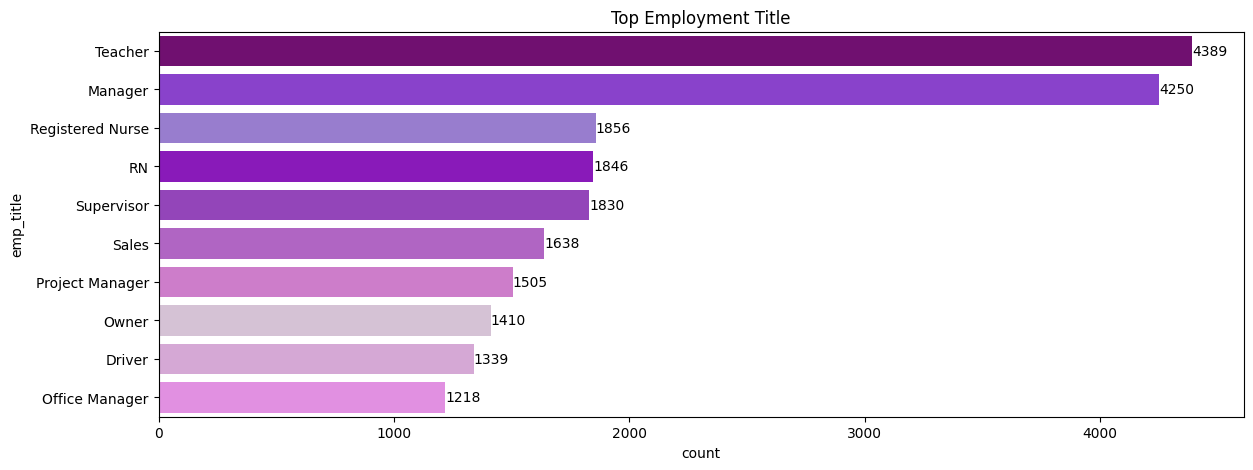

In [ ]:
# Create a horizontal bar for Top Employment Title
plt.figure(figsize=(14, 5))
plot_counts('emp_title', 'Top Employment Title')

**🔍OBSERVATION🔎**
- Teacher: 27,316 - The most frequent job title in this dataset, indicating that a significant portion of the loan applicants are teachers.
- Manager: 4,250 - The second most common job title, though much less frequent than teachers.
- Registered Nurse: 1,856 - A notable number, suggesting that a decent proportion of the dataset consists of registered nurses.
- RN: 1,846 - Similar to registered nurses, showing a high number of individuals with this job title.
- Supervisor: 1,830 - Close in number to registered nurses and RNs, but slightly lower.

In [ ]:
# Value couts for categorical columns
categorical_cols = df.select_dtypes(include=['category']).columns
for elem in categorical_cols:
  print(f"Column Name: {elem}")
  print(data[elem].value_counts())
  print()
  print(round(((data[elem].value_counts(normalize=True)) * 100),2))
  print("_" * 35)
  print()

Column Name: term
term
 36 months    302005
 60 months     94025
Name: count, dtype: int64

term
 36 months    76.26
 60 months    23.74
Name: proportion, dtype: float64
___________________________________

Column Name: grade
grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: count, dtype: int64

grade
B    29.30
C    26.76
A    16.21
D    16.04
E     7.95
F     2.97
G     0.77
Name: proportion, dtype: float64
___________________________________

Column Name: sub_grade
sub_grade
B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: count, dtype: int64

sub_grade
B3    6.73
B4 

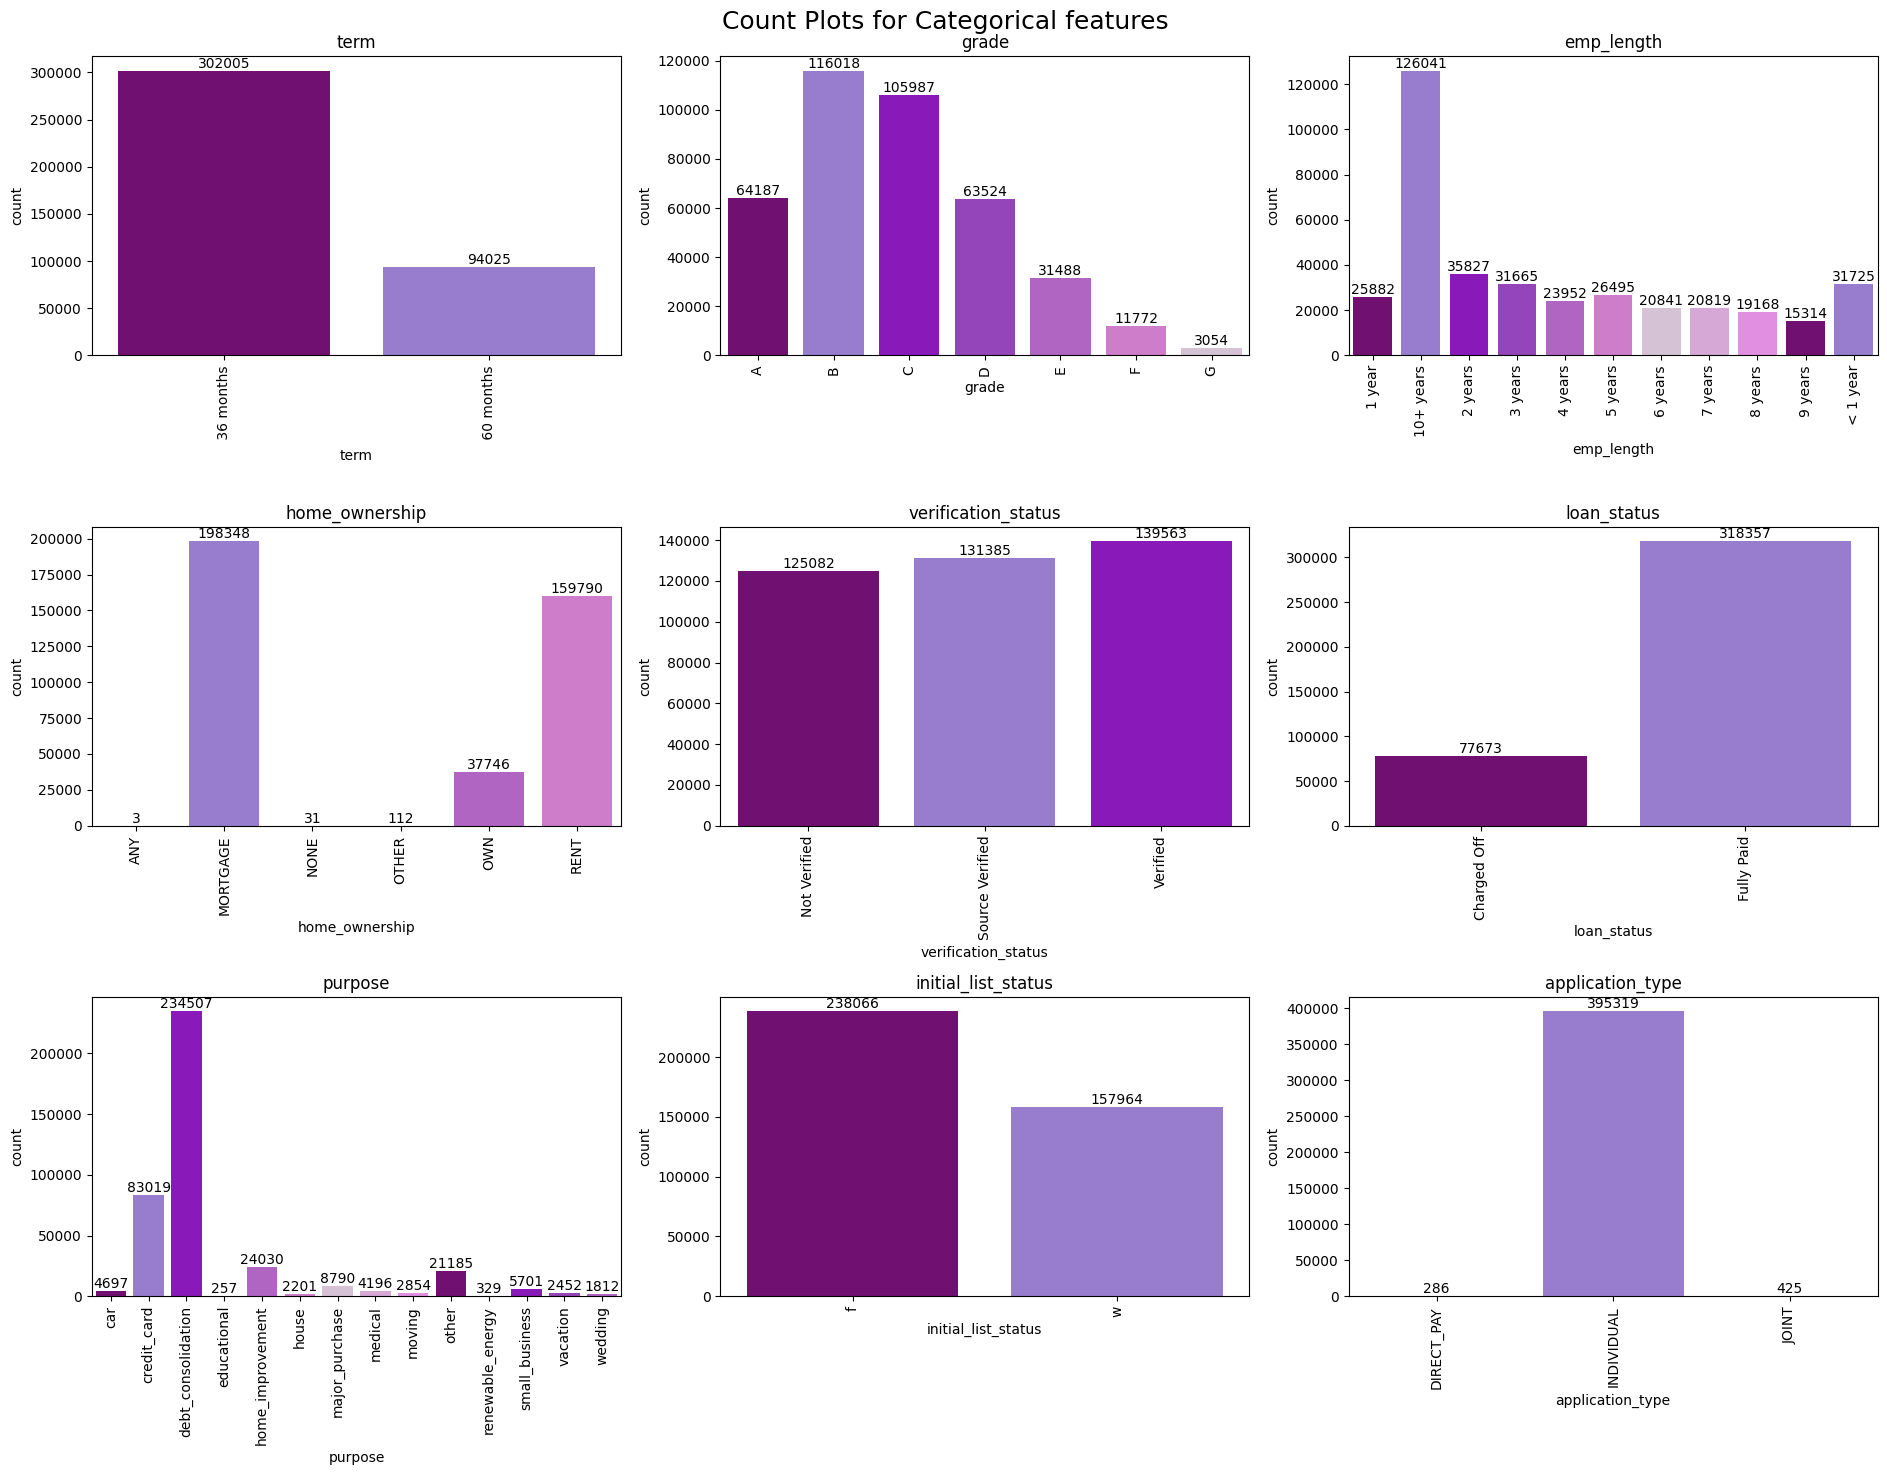

In [ ]:
columns = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'initial_list_status', 'application_type']
purple_palette = ['#800080', '#9370DB', '#9400D3', '#9932CC', '#BA55D3', '#DA70D6', '#D8BFD8', '#DDA0DD', '#EE82EE']

plt.figure(figsize=(19,15))
for i, elem in enumerate(columns):
  plt.subplot(3,3,i+1)
  label = sns.countplot(data = df, x = elem, palette = purple_palette)
  for i in label.containers:
    label.bar_label(i)

  plt.xticks(rotation = 90)
  plt.ylabel('count')
  plt.title(elem)

plt.suptitle("Count Plots for Categorical features", fontsize = 18)
plt.tight_layout()
plt.show()

**🔍OBSERVATION🔎**
1. **Term:**
    - The majority of loans have a term of 36 months, with 60-month loans being less common.
    - **Proportion:**
      - 36 months: 76.26%
      - 60 months: 23.74%
2. **Grade:**
    - The most common grades are B and C, followed by A and D. Grades E, F, and G are less common.
    - **Proportion (Top 3):**
      - B: 29.30%
      - C: 26.76%
      - A: 16.21%
3. **emp_length:**
    -  The majority of borrowers have been employed for 10+ years, with a significant number having 2 years or less of employment length.
    - **Proportion (Top 3):**
      - 10+ years: 33.37%
      - 2 years: 9.48%
      - <1 year: 8.40%

4. **Home Ownership:**
    - Most borrowers have a mortgage or rent their homes, with fewer owning their homes. Other categories are negligible.
    - **Proportion (Top 3):**
      - MORTGAGE: 50.08%
      - RENT: 40.35%
      - OWN: 9.53%

5. **Verification Status:**
    - The data is almost evenly split among 'Verified', 'Source Verified', and 'Not Verified', with 'Verified' being slightly more common.
    - **Proportion:**
      - Verified: 35.24%
      - Source Verified: 33.18%
      - Not Verified: 31.58%

6. **Loan Status:**
    - The majority of loans are 'Fully Paid', with a smaller portion being 'Charged Off'
    - **Proportion:**
      - Fully Paid: 80.39%
      - Charged Off: 19.61%  

7. **Purpose:**
    - The most common loan purpose is 'debt_consolidation', followed by 'credit_card'. Other purposes like 'home_improvement' and 'other' are less frequent.
    - **Proportion (Top 3):**
      - debt_consolidation: 59.21%
      - credit_card: 20.96%
      - home_improvement: 6.07%

8. **Initial List Status:**
    -  Most loans have an initial list status of 'f', with 'w' being less common.
    - **Proportion:**
      - f: 60.11%
      - w: 39.89%

9. **Application Type:**
    - The majority of applications are 'INDIVIDUAL', 'JOINT' and 'DIRECT_PAY' being very rare.
    - **Proportion:**
      - INDIVIDUAL: 99.82%
     - JOINT: 0.11%
      - DIRECT_PAY: 0.07%    


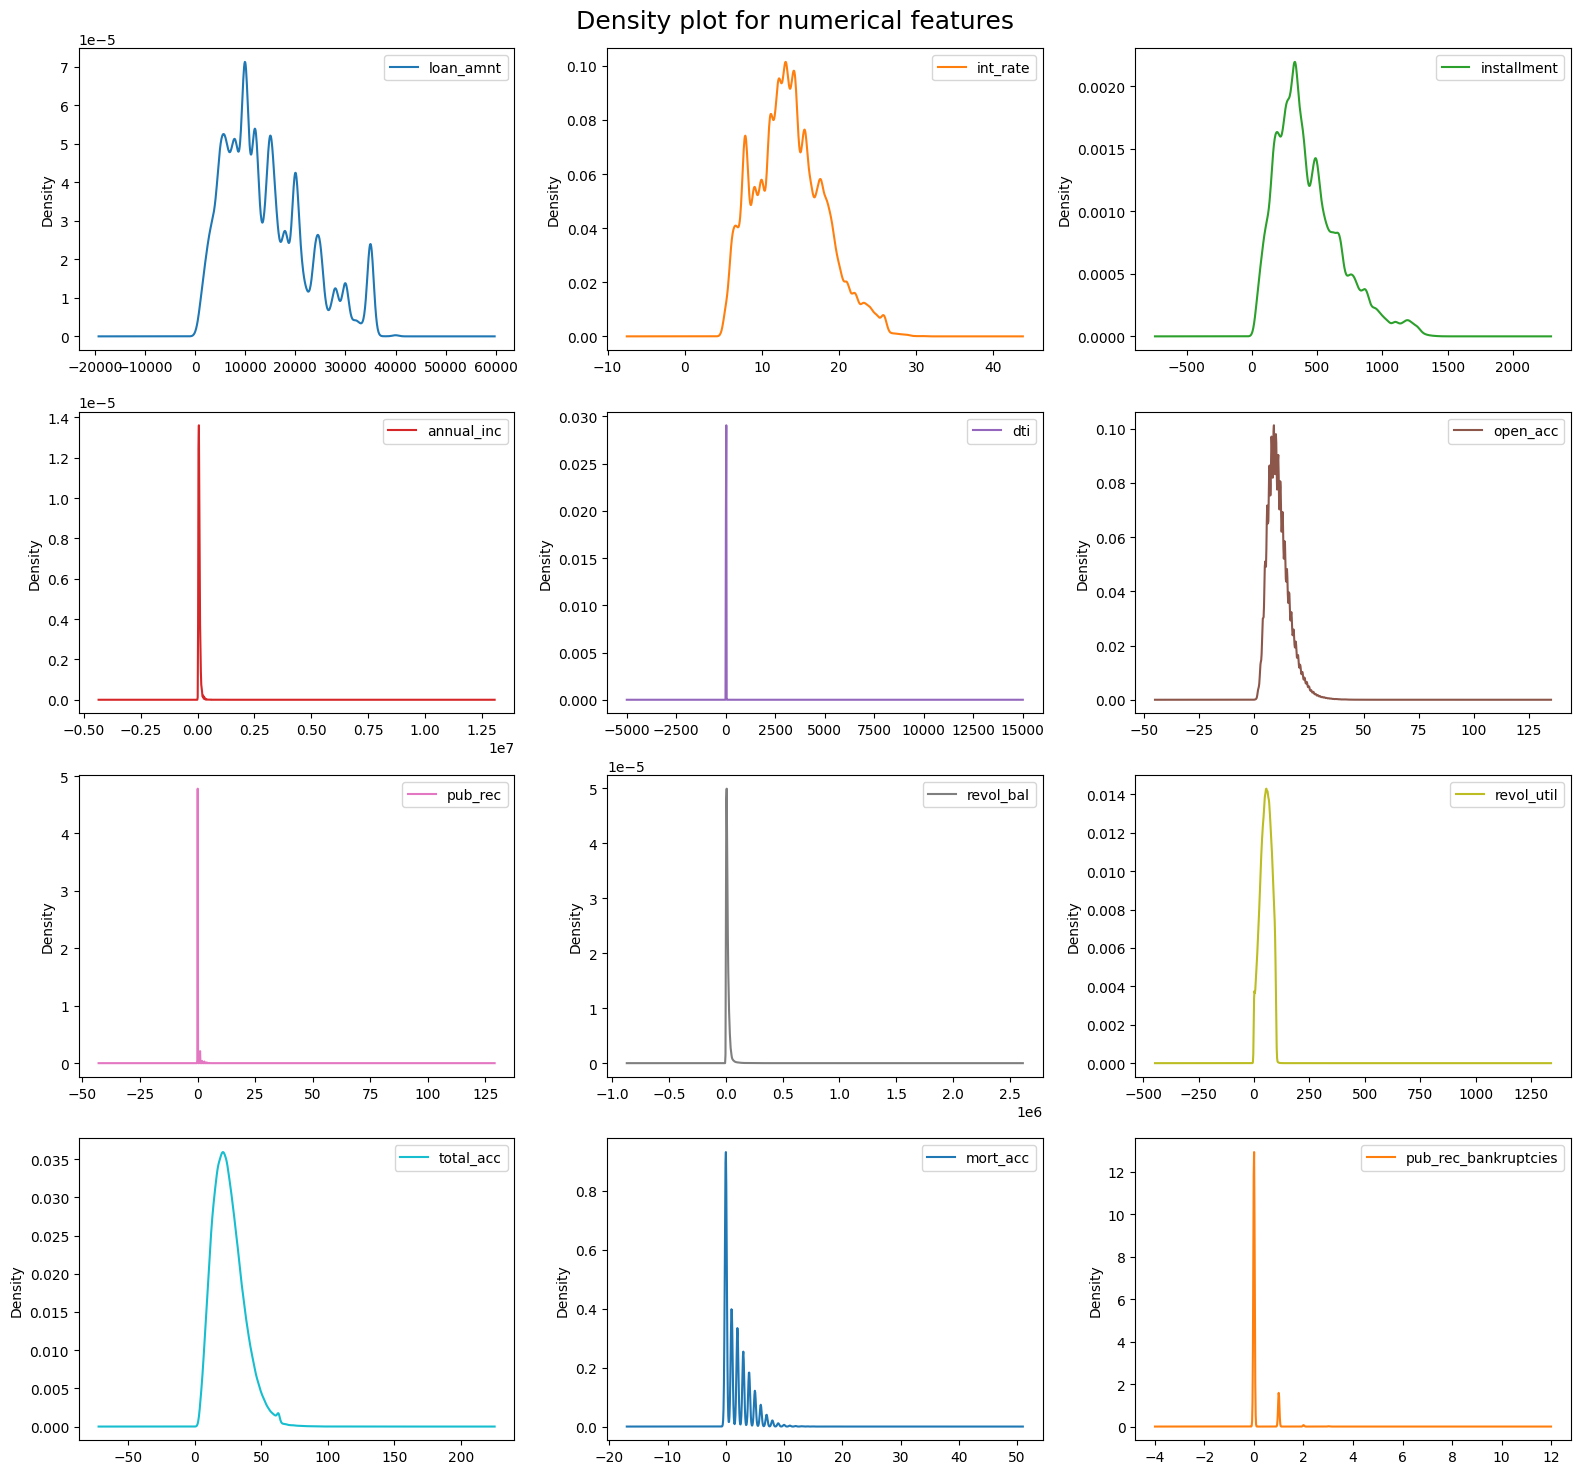

In [ ]:
# Density plot for numerical columns
numerical_df = df.select_dtypes(include=['int64','float64'])

plt.rcParams["figure.figsize"] = [16,15]
numerical_df.plot(kind="density", subplots = True, layout = (4,3), sharex = False)
plt.suptitle("Density plot for numerical features", fontsize = 18)
plt.tight_layout()
plt.show()

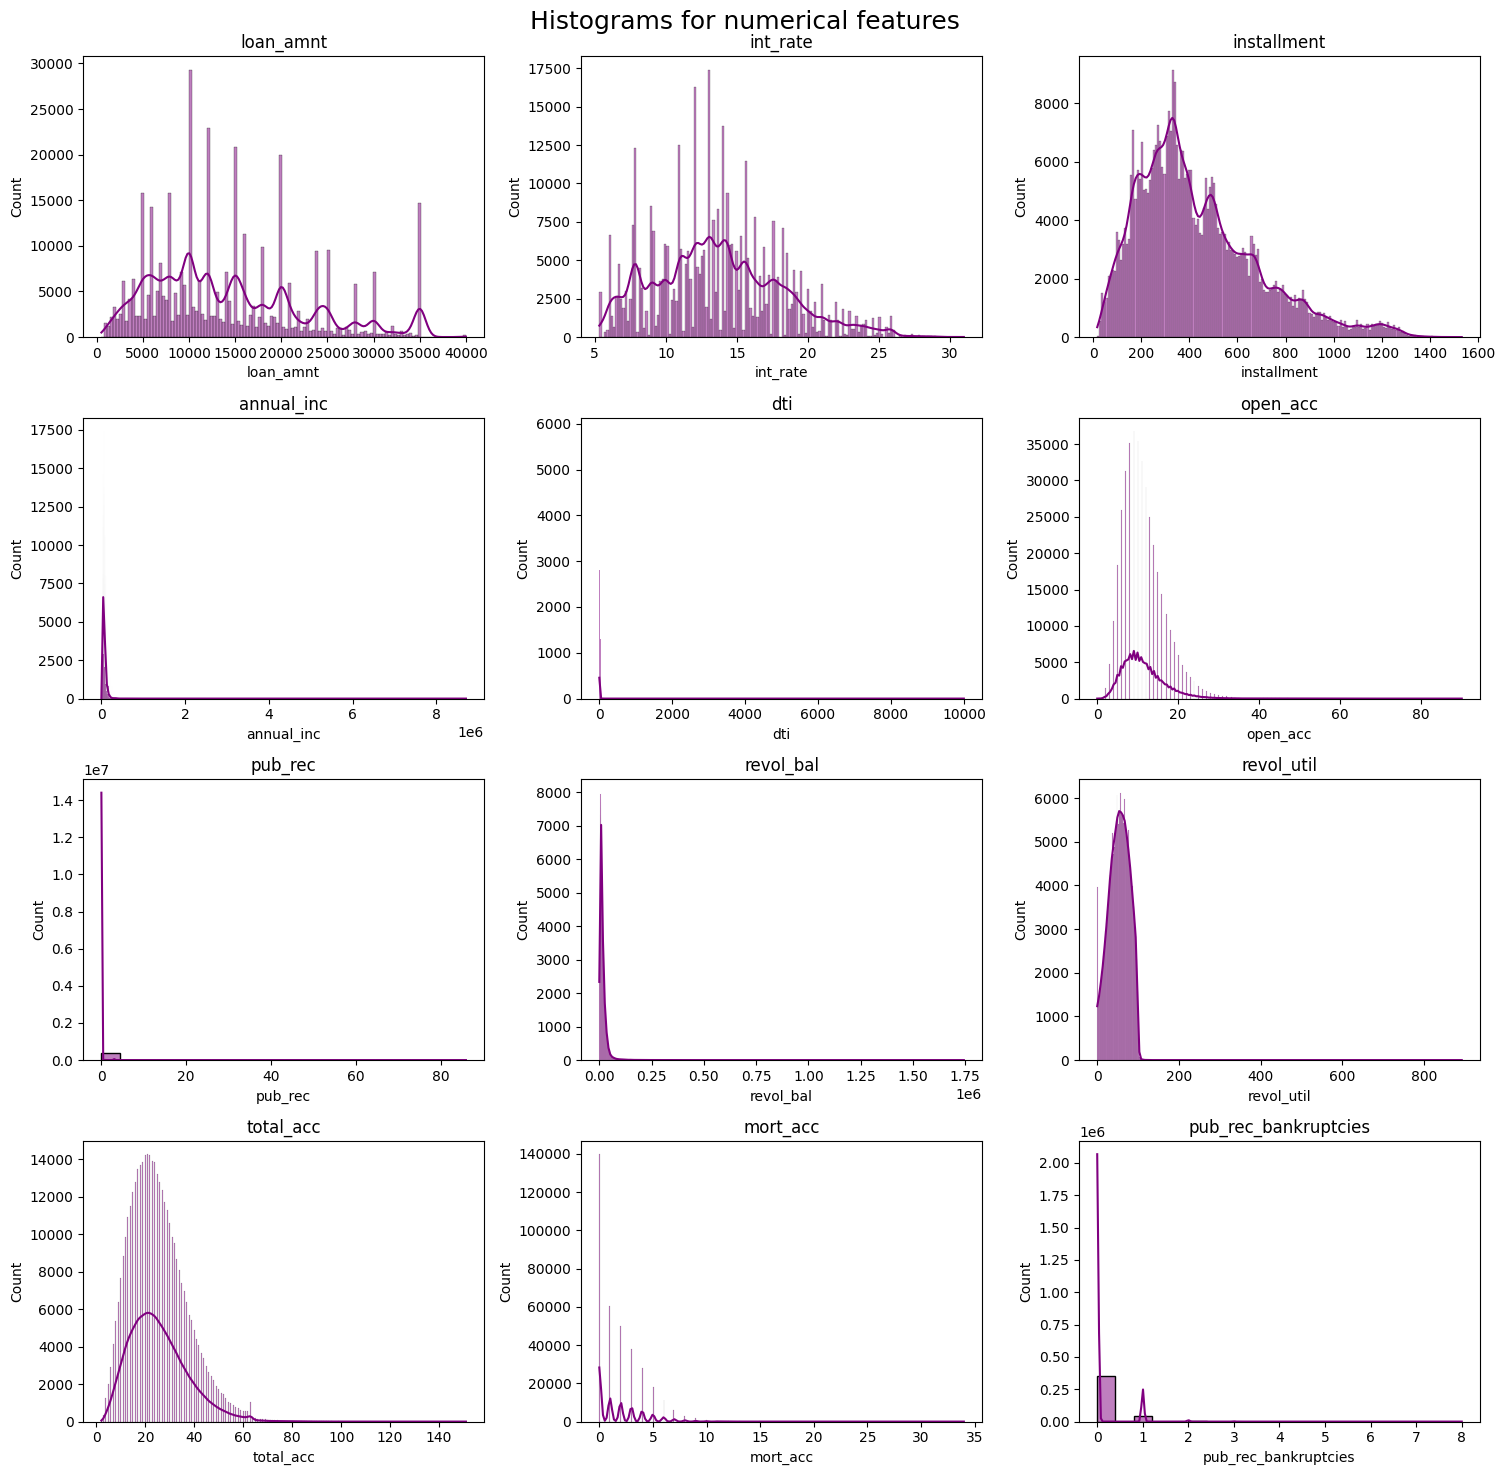

In [ ]:
# Histograms for numerical columns
numerical_cols = numerical_df.columns

plt.figure(figsize=(15,15))
for i, elem in enumerate(numerical_cols):
  plt.subplot(4,3,i+1)
  sns.histplot(df[elem], kde=True, color='purple')
  plt.title(elem)

plt.suptitle("Histograms for numerical features", fontsize = 18)
plt.tight_layout()
plt.show()

In [ ]:
# Skewness Coefficient:
numerical_df = df.select_dtypes(include=['int64','float64'])
print("Skewness Coefficient")
print("-" * 20)
numerical_df.skew().round(4)

Skewness Coefficient
--------------------


loan_amnt                 0.7773
int_rate                  0.4207
installment               0.9836
annual_inc               41.0427
dti                     431.0512
open_acc                  1.2130
pub_rec                  16.5766
revol_bal                11.7275
revol_util               -0.0718
total_acc                 0.8643
mort_acc                  1.6001
pub_rec_bankruptcies      3.4234
dtype: float64

**🔍OBSERVATION🔎**

1. **loan_amnt(0.77):** Positively skewed, indicating more loans are on the lower end of the amount scale with a long tail towards higher amounts.

2. **int_rate(0.42):** Slightly positively skewed, suggesting a mild concentration of lower interest rates with a few high rates.

3. **installment(0.98):** Positively skewed, indicating most installment amounts are lower with a few higher values.

4. **annual_inc(41.04):** Highly positively skewed, indicating the majority of incomes are on the lower end with a few extremely high incomes.

5. **dti(431.05):** Extremely positively skewed, suggesting a heavy concentration of lower debt-to-income ratios with some extremely high values.

  - **Note:**
    - Low DTI (Less Than 20%): This indicates that you have a healthy financial balance, with most of your income available for savings and discretionary spending
    -  Moderate DTI (20-36%): A moderate DTI suggests that a significant portion of your income is allocated to debt payments but is still manageable.

6. **open_acc(1.21):** Positively skewed, indicating most borrowers have fewer open accounts with a long tail towards those with many open accounts.

  - **Note:**
    -  This could suggest a more conservative borrowing behavior where the majority of borrowers do not maintain numerous active credit lines.
    -  The financial institution’s customer base predominantly consists of borrowers who manage fewer credit accounts, potentially indicating lower credit utilization and possibly lower risk profiles.

7. **pub_rec(16.57):** Highly positively skewed, indicating the majority of borrowers have few public records with a long tail towards those with many public records.

8. **revol_bal(11.72):** Highly positively skewed, suggesting most revolving balances are lower with a few very high balances.

  - Note:
    - Most borrowers have relatively low revolving credit balances. This implies that for the majority of customers, their outstanding balances on credit cards or revolving lines of credit are not very high.
    - A large portion of the customer base manages their credit effectively, maintaining lower balances. This is generally a positive sign, indicating lower credit risk and potentially higher creditworthiness for these individuals.

9. **revol_util(-0.07):** Slightly negatively skewed, indicating a near-symmetrical distribution but with a slight tail towards lower utilization rates.

  - **Note:**
    - Most customers manage their credit lines in a balanced way, which is generally a positive sign for credit risk assessment.

10. **total_acc(0.86):** Positively skewed, indicating most borrowers have fewer total accounts with a few having a very high number of accounts.

11. **mort_acc(1.60):** Positively skewed, indicating the majority of borrowers have few mortgage accounts with a long tail towards those with many accounts.

12. **pub_rec_bankruptcies(3.42):** Highly positively skewed, indicating most borrowers have no bankruptcies with a few having multiple bankruptcies.

In [ ]:
# kurtosis co-efficient:
print("kurtosis co-efficient")
print("-" * 22)
numerical_df.kurt().round(4)

kurtosis co-efficient
----------------------


loan_amnt                   -0.0626
int_rate                    -0.1439
installment                  0.7838
annual_inc                4238.5506
dti                     237923.6765
open_acc                     2.9669
pub_rec                   1867.4666
revol_bal                  384.2211
revol_util                   2.7123
total_acc                    1.2046
mort_acc                     4.4772
pub_rec_bankruptcies        18.1042
dtype: float64

**🔍OBSERVATION🔎**

1. **loan_amnt(-0.06):** The distribution of loan amounts is close to normal, with slightly lighter tails indicating fewer extreme loan amounts compared to a normal distribution.

2. **int_rate(-0.14):** Interest rates are also near normally distributed, with a slight tendency towards lighter tails, suggesting fewer extremely high or low interest rates.

3. **installment(0.78):** Installment amounts have a distribution with moderately heavy tails, indicating some presence of outliers in the installment amounts.

4. **annual_inc(4238.55):** Annual income is **highly leptokurtic**, suggesting a significant presence of outliers with very high incomes, indicating extreme income values in the dataset.

5. **dti(237923.67):** Debt-to-income ratio shows an **extremely high positive kurtosis**, indicating the presence of extreme values or outliers in the debt-to-income ratio.

6. **open_acc(2.96):** The number of open accounts has moderately heavy tails, indicating some outliers with a high number of open accounts.

7. **pub_rec(1867.46):** Public records have a **very high positive kurtosis**, indicating a significant presence of extreme values or outliers.

8. **revol_bal(384.22):**  Revolving balance is **highly leptokurtic**, suggesting many outliers with very high revolving balances.

9. **revol_util(2.71):** Revolving credit utilization has moderately heavy tails, indicating some presence of extreme utilization rates.

10. **total_acc(1.20):** Total number of accounts has moderately heavy tails, indicating some outliers with a very high total number of accounts.

11. **mort_acc(4.47):** Mortgage accounts have **heavy tails**, indicating some extreme values with very high numbers of mortgage accounts.

12. **pub_rec_bankruptcies(18.10):** Public record bankruptcies are **highly leptokurtic**, indicating a significant presence of extreme values or outliers.

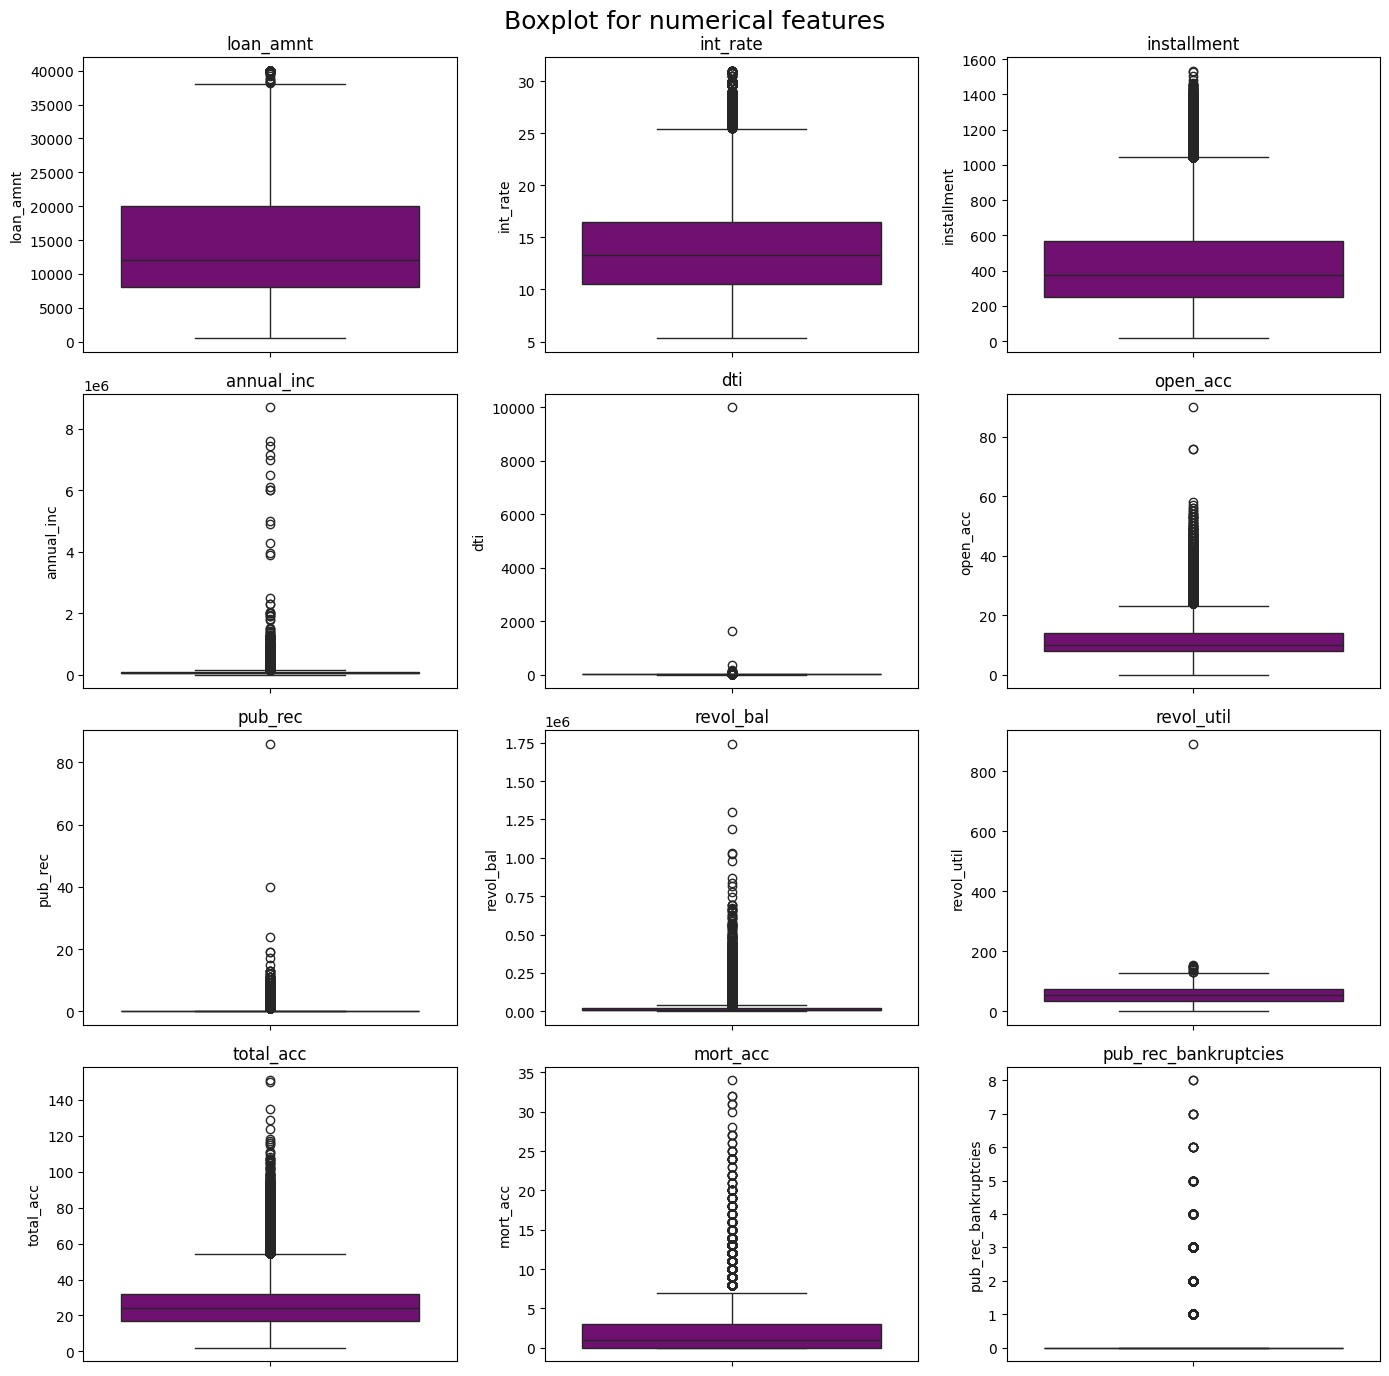

In [ ]:
# Box plots for numerical columns
numerical_cols = numerical_df.columns
purple_palette = ['#800080']

plt.figure(figsize=(14, 14))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i+1)
    sns.boxplot(df[col],palette = purple_palette)
    plt.title(col)

plt.suptitle("Boxplot for numerical features", fontsize = 18)
plt.tight_layout()
plt.show()

### <font color=#9F2B68>**8.2) Bivariate Analysis📉💹**</font>

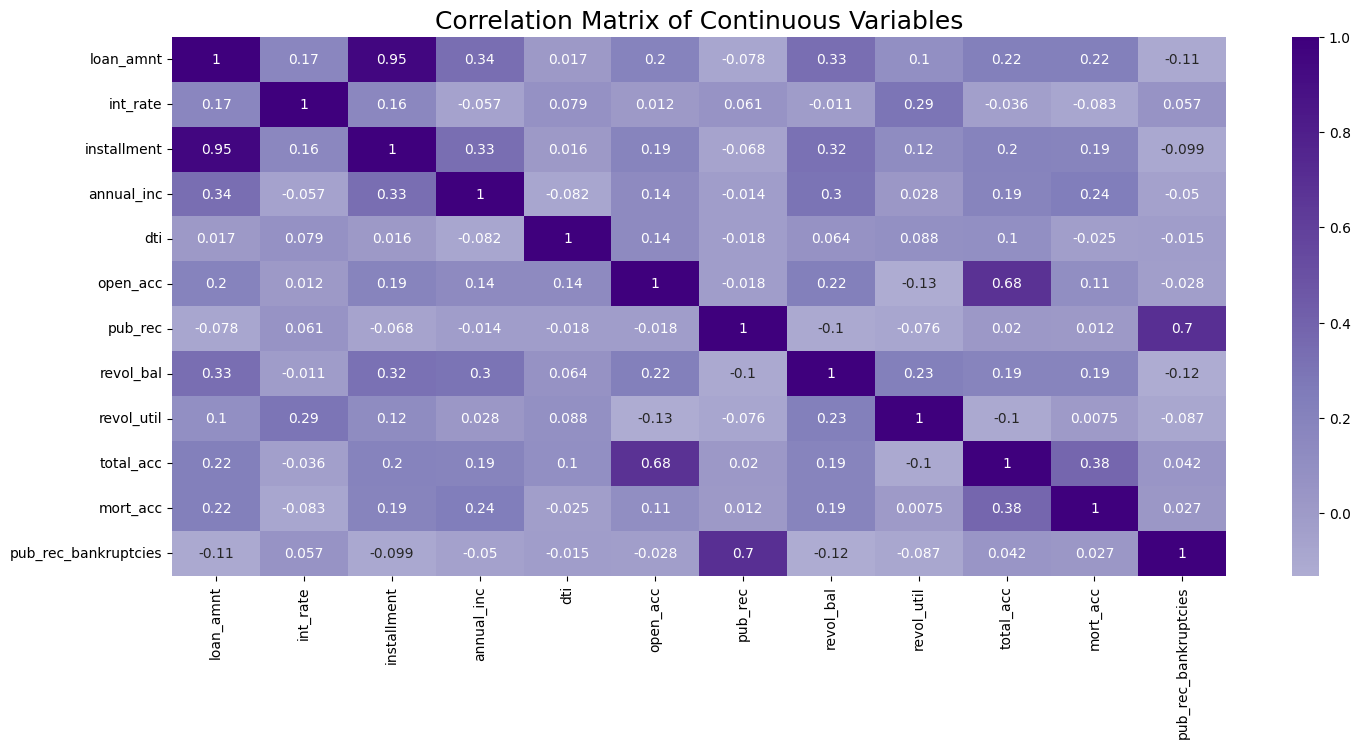

In [ ]:
# Correlation Matrix of Continuous Variables
corr_matrix = numerical_df.corr()
plt.figure(figsize=(17, 7))
sns.heatmap(corr_matrix, annot=True, cmap='Purples', center=0)
plt.title('Correlation Matrix of Continuous Variables', fontsize = 18)
plt.show()

**🔍OBSERVATION🔎**

Noticeable Correlations are,

- **Strong positive correlation(above 0.65)**
  - loan_amnt Vs installment🥇
  - pub_rec Vs pub_rec_bankruptcies🥈
  - open_acc Vs total_acc🥉

- **Moderate positive correlation(above 0.30 to 0.65)**
  - total_acc Vs mort_acc🥇
  - loan_amnt: Vs annual_inc🥈
  - loan_amnt Vs revol_bal🥉
  - installment Vs revol_bal
  - annual_inc Vs revol_bal

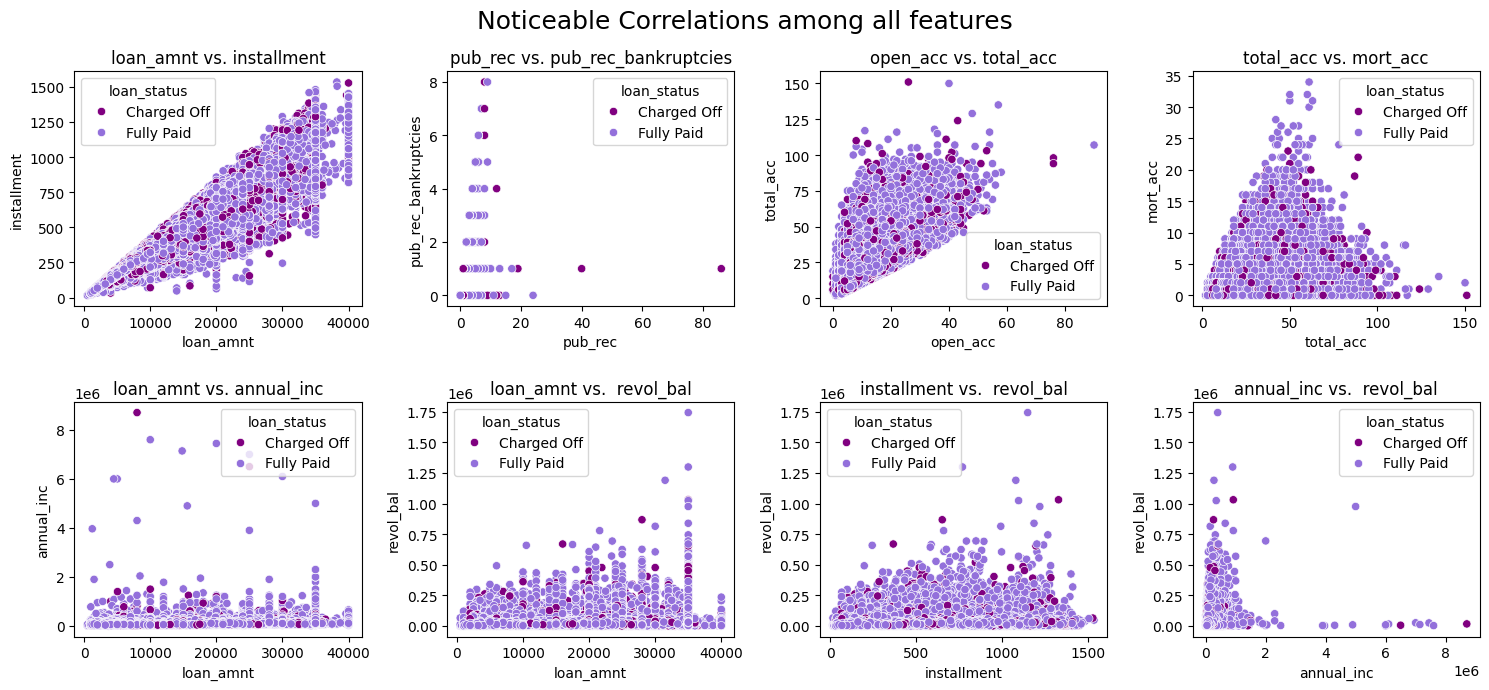

In [ ]:
# Noticeable Correlations among all features
req_palette = ['#800080', '#9370DB']

plt.figure(figsize=(15, 7))

plt.subplot(2, 4, 1)
sns.scatterplot(x='loan_amnt', y='installment', hue='loan_status', data=df, palette=req_palette)
plt.title("loan_amnt vs. installment")

plt.subplot(2, 4, 2)
sns.scatterplot(x='pub_rec', y='pub_rec_bankruptcies', hue='loan_status', data=df, palette=req_palette)
plt.title("pub_rec vs. pub_rec_bankruptcies")

plt.subplot(2, 4, 3)
sns.scatterplot(x='open_acc', y='total_acc', hue='loan_status', data=df, palette=req_palette)
plt.title("open_acc vs. total_acc")

plt.subplot(2, 4, 4)
sns.scatterplot(x='total_acc', y='mort_acc', hue='loan_status', data=df, palette=req_palette)
plt.title("total_acc vs. mort_acc")

plt.subplot(2, 4, 5)
sns.scatterplot(x='loan_amnt', y='annual_inc', hue='loan_status', data=df, palette=req_palette)
plt.title("loan_amnt vs. annual_inc")

plt.subplot(2, 4, 6)
sns.scatterplot(x='loan_amnt', y='revol_bal', hue='loan_status', data=df, palette=req_palette)
plt.title("loan_amnt vs.  revol_bal")

plt.subplot(2, 4, 7)
sns.scatterplot(x='installment', y='revol_bal', hue='loan_status', data=df, palette=req_palette)
plt.title("installment vs.  revol_bal")

plt.subplot(2, 4, 8)
sns.scatterplot(x='annual_inc', y='revol_bal', hue='loan_status', data=df, palette=req_palette)
plt.title("annual_inc vs.  revol_bal")

plt.suptitle("Noticeable Correlations among all features", fontsize = 18)
plt.tight_layout()
plt.show()

In [ ]:
# Comparisons of Median values of all numerical features by loan status
numerical_cols = numerical_df.columns

print("Comparisons of Median values of all numerical features by loan status")
print("-" * 72)

for elem in numerical_cols:
  print(f"Column Name: {elem}")
  print(df.groupby('loan_status')[elem].median())
  print("_" * 35)
  print()

Comparisons of Median values of all numerical features by loan status
------------------------------------------------------------------------
Column Name: loan_amnt
loan_status
Charged Off    14000.0
Fully Paid     12000.0
Name: loan_amnt, dtype: float64
___________________________________

Column Name: int_rate
loan_status
Charged Off    15.61
Fully Paid     12.99
Name: int_rate, dtype: float64
___________________________________

Column Name: installment
loan_status
Charged Off    399.06
Fully Paid     369.51
Name: installment, dtype: float64
___________________________________

Column Name: annual_inc
loan_status
Charged Off    59000.0
Fully Paid     65000.0
Name: annual_inc, dtype: float64
___________________________________

Column Name: dti
loan_status
Charged Off    19.34
Fully Paid     16.34
Name: dti, dtype: float64
___________________________________

Column Name: open_acc
loan_status
Charged Off    11.0
Fully Paid     10.0
Name: open_acc, dtype: float64
____________________

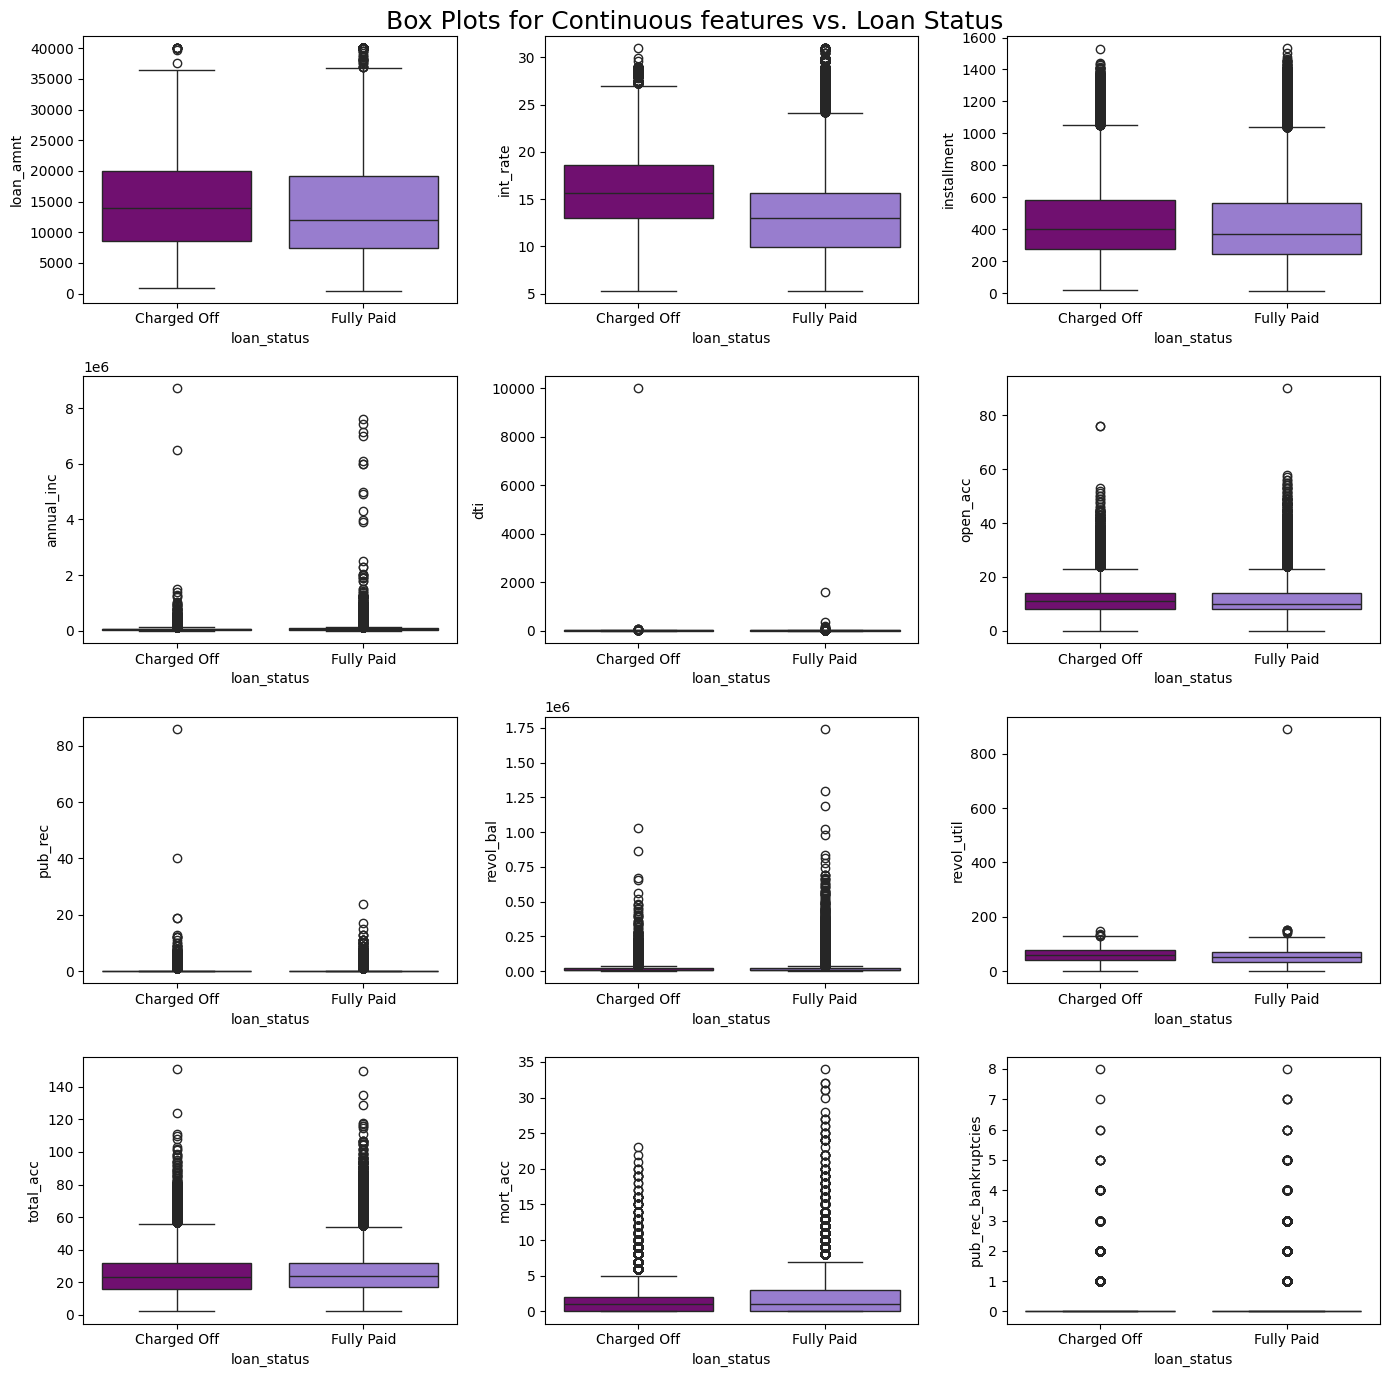

In [ ]:
# Box Plots for Continuous features vs. Loan Status
numerical_cols = numerical_df.columns
req_palette = ['#800080', '#9370DB']

plt.figure(figsize=(14, 14))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x='loan_status', y=col, data=df, palette = req_palette)

plt.suptitle("Box Plots for Continuous features vs. Loan Status", fontsize = 18)
plt.tight_layout()
plt.show()

**🔍OBSERVATION🔎**

Based on Median Values of Numerical Features by Loan Status,

1. loan_amnt:
    - Charged Off: 14,000 dollers
    - Fully Paid: Median loan amount is 12,000 dollers
    - Loans that are charged off tend to have higher median amounts compared to fully paid loans.

2. int_rate:
    - Charged Off: 15.61%
    - Fully Paid: 12.99%
    - Charged off loans have higher median interest rates, indicating a potential higher risk profile.

3. installment:
    - Charged Off: 399.06 dollers
    - Fully Paid: 369.51 dollers
    - Charged off loans have higher median installment payments.

4. annual_inc:
    - Charged Off: 59,000 dollers
    - Fully Paid: 65,000 dollers
    - Fully paid loans are associated with higher median annual incomes, suggesting better financial stability.

5. dti:
    - Charged Off: 19.34
    - Fully Paid: 16.34
    - Charged off loans have a higher median DTI ratio, indicating higher debt burden relative to income.

6. open_acc:
    - Charged Off: Median number of open accounts is 11
    - Fully Paid: Median number of open accounts is 10
    - Charged off loans have a slightly higher median number of open accounts.

7. pub_rec:
    - Charged Off: Median number of public records is 0
    - Fully Paid: Median number of public records is 0
    - Both loan statuses have a median of zero public records.

8. revol_bal:
    - Charged Off: 11,277 dollers
    - Fully Paid: 11,158 dollers
    - Observation: Charged off loans have a slightly higher median revolving balance.

9. revol_util:
    - Charged Off: 59.3%
    - Fully Paid: 53.7%
    - Charged off loans have higher median revolving utilization rates, suggesting higher credit usage.

10. total_acc:
    - Charged Off: 23
    - Fully Paid: 24
    - Fully paid loans have a slightly higher median number of total accounts.

11. mort_acc:
    - Charged Off: 1
    - Fully Paid: 1
    - Observation: Both loan statuses have the same median number of mortgage accounts.

12. pub_rec_bankruptcies:
    - Charged Off: 0
    - Fully Paid: 0
    - Both loan statuses have a median of zero public record bankruptcies.

**Insights**

- Higher Loan Amounts and Interest Rates: Charged off loans generally have higher median loan amounts and interest rates, which may indicate higher risk profiles.
- Income and DTI Ratios: Fully paid loans are associated with higher median incomes and lower DTI ratios, suggesting better financial health.
- Revolving Utilization: Higher median revolving utilization rates for charged off loans indicate higher levels of credit usage, which could be a risk factor.


In [ ]:
# Proportion of loan status by all categorical features
categorical_cols = df.select_dtypes(include=['category']).columns

print("Proportion of loan status by all categorical features")
print("-" * 56)

for elem in categorical_cols:
  print(f"Column Name: {elem}")
  print((df.groupby('loan_status')[elem].value_counts(normalize=True) * 100).round(2))
  print("_" * 35)
  print()

Proportion of loan status by all categorical features
--------------------------------------------------------
Column Name: term
loan_status  term      
Charged Off   36 months    61.33
              60 months    38.67
Fully Paid    36 months    79.90
              60 months    20.10
Name: proportion, dtype: float64
___________________________________

Column Name: grade
loan_status  grade
Charged Off  C        28.90
             D        23.61
             B        18.78
             E        15.15
             F         6.48
             A         5.20
             G         1.88
Fully Paid   B        31.86
             C        26.24
             A        18.89
             D        14.19
             E         6.20
             F         2.12
             G         0.50
Name: proportion, dtype: float64
___________________________________

Column Name: sub_grade
loan_status  sub_grade
Charged Off  C4           6.14
             C3           5.97
             C5           5.76
      

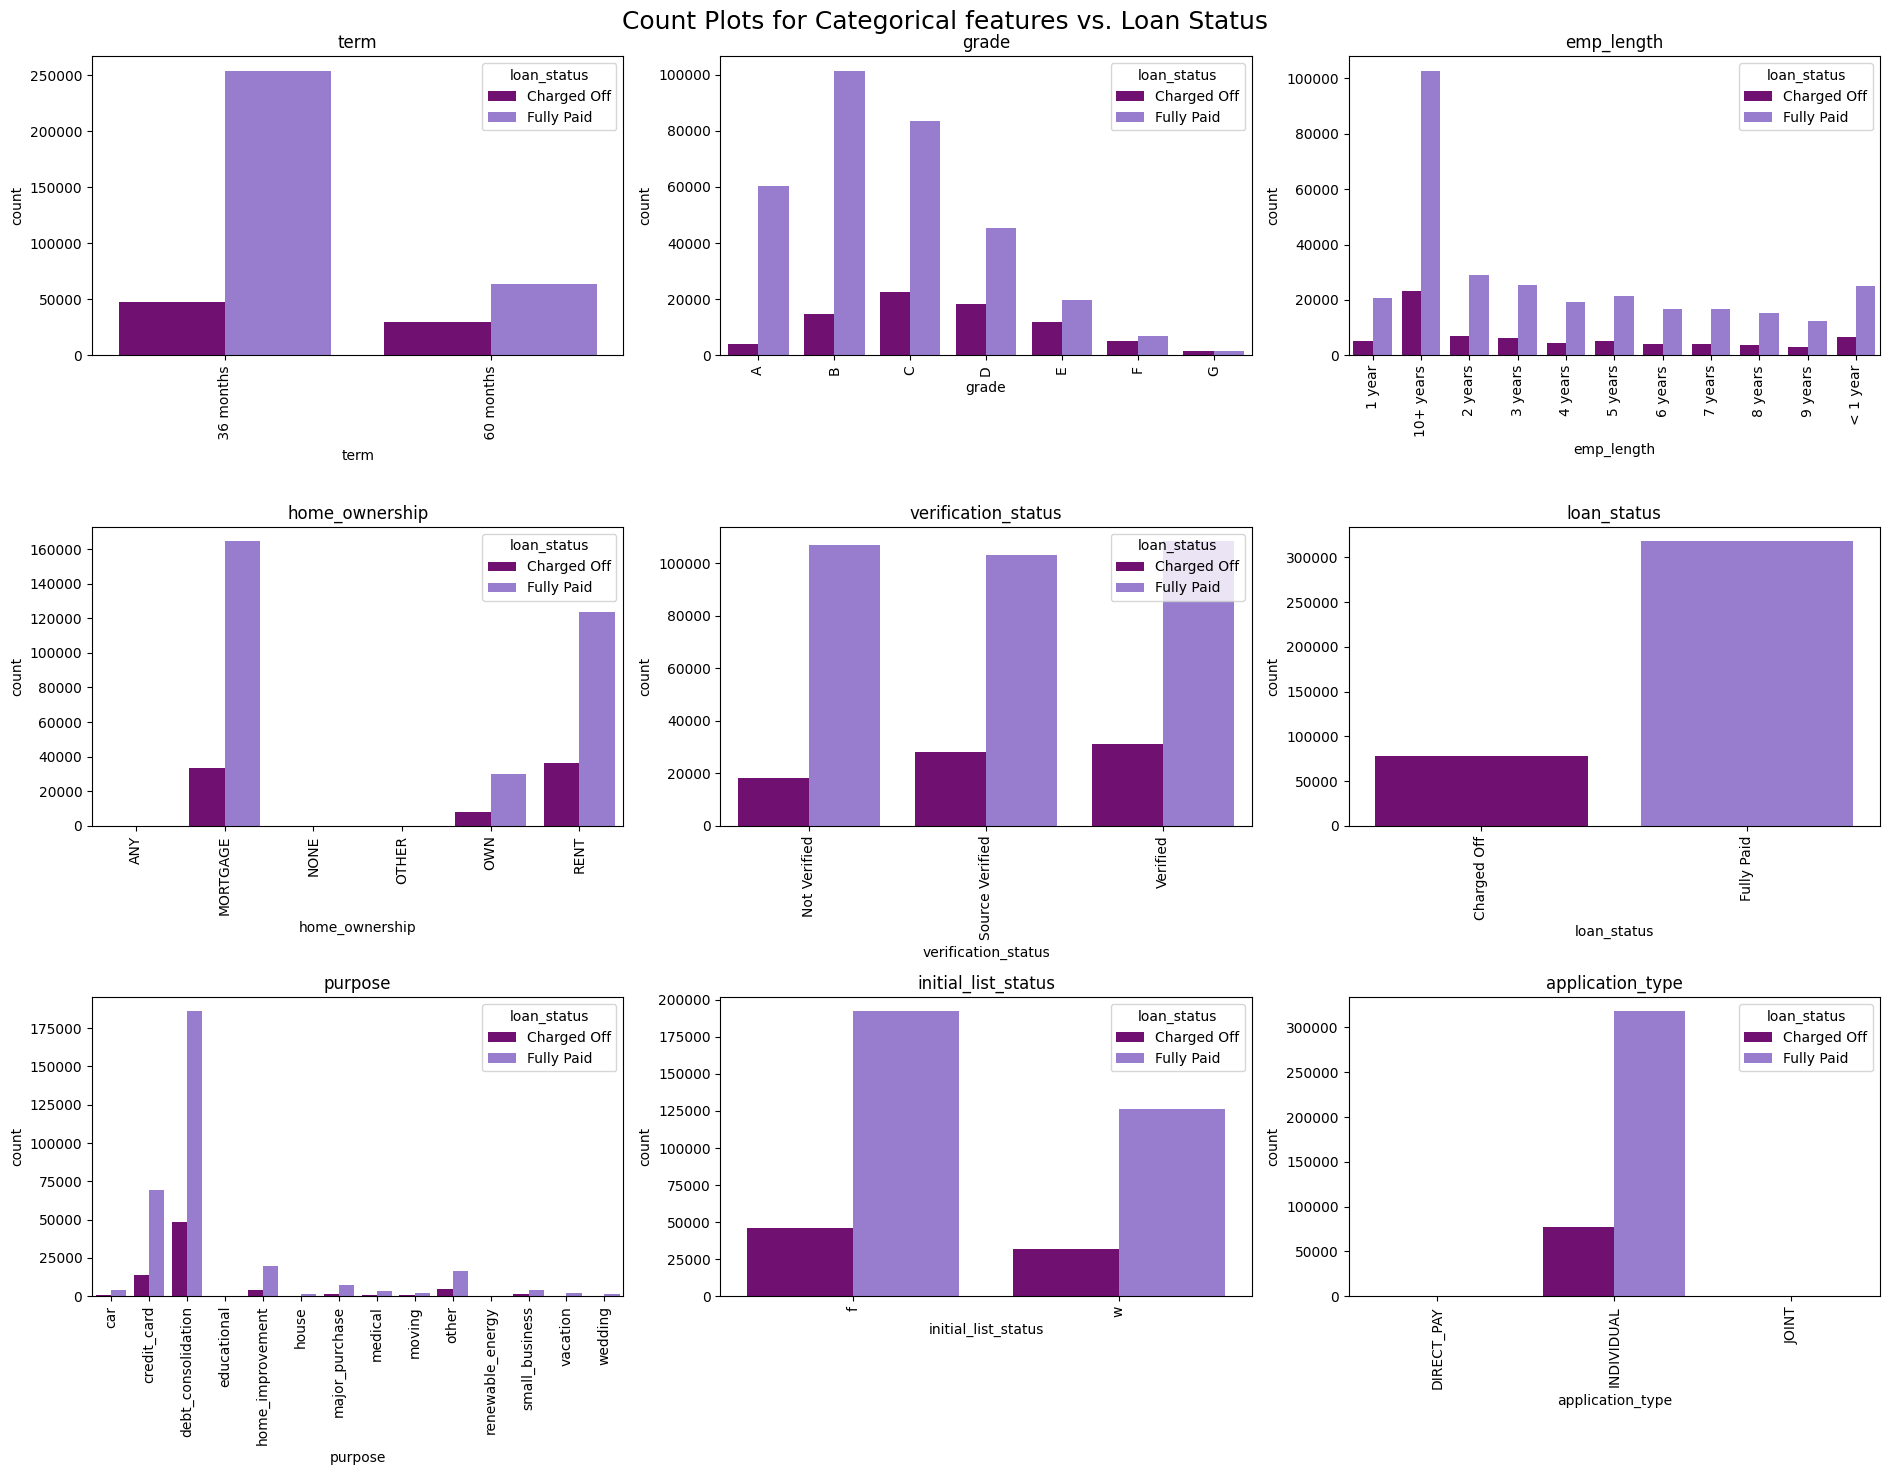

In [ ]:
# Count Plots for Categorical features vs. Loan Status
columns = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'initial_list_status', 'application_type']
purple_palette = ['#800080', '#9370DB', '#9400D3', '#9932CC', '#BA55D3', '#DA70D6', '#D8BFD8', '#DDA0DD', '#EE82EE']

plt.figure(figsize=(19,15))
for i, elem in enumerate(columns):
  plt.subplot(3,3,i+1)
  label = sns.countplot(data = df, x = elem, hue='loan_status', palette = purple_palette)

  plt.xticks(rotation = 90)
  plt.ylabel('count')
  plt.title(elem)

plt.suptitle("Count Plots for Categorical features vs. Loan Status", fontsize = 18)
plt.tight_layout()
plt.show()

**🔍OBSERVATION🔎**

1. **Term:** Borrowers with 36-month terms have higher proportions of both "Charged Off" and "Fully Paid" loans compared to 60-month terms. However, the difference is more significant for "Fully Paid" loans.

2. **Grade:** Grade C has the highest proportion of "Charged Off" loans, whereas grade B has the highest proportion of "Fully Paid" loans, indicating that loans with better grades are more likely to be fully paid.

3. **Employment Length:** Borrowers with over 10 years of employment are the most likely to both charge off and fully pay their loans, with a slightly higher proportion for fully paid loans.

4. **Home Ownership:** RENT has the highest proportion of charged-off loans, while MORTGAGE has the highest proportion of fully paid loans, suggesting that owning a home might be a positive indicator of loan repayment ability.

5. **Verification Status:** Loans that are Verified have the highest proportions for both "Charged Off" and "Fully Paid," with a slightly higher proportion of fully paid loans.

6. **Purpose:** Debt consolidation is the most common purpose for both charged-off and fully paid loans, with a higher proportion of charged-off loans, indicating potential risk in this category.

7. **Initial List Status:** Loans listed as 'f' have the highest proportions for both categories, with a slightly higher proportion of fully paid loans.

8. **Application Type:** Individual applications have higher proportions for both charged-off and fully paid loans, with negligible differences.

## **9) Data preprocessing🎰**

### <font color=#9F2B68>**9.1) Check for Duplicate👬**</font>

In [ ]:
# Checking for duplicate rows
duplicate_rows = df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

# Displaying duplicate rows
df_duplicates = df[duplicate_rows]
print(df_duplicates)

Number of duplicate rows: 0
Empty DataFrame
Columns: [loan_amnt, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, purpose, title, dti, earliest_cr_line, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, application_type, mort_acc, pub_rec_bankruptcies, address]
Index: []

[0 rows x 27 columns]


**🔍OBSERVATION🔎**

- There is no duplicate records.

In [ ]:
# Duplicate counts in columns
duplicate_summary = df.apply(lambda x: x.duplicated().sum())
print("Duplicate counts in columns:")
print("-" * 30)
print(duplicate_summary)

Duplicate counts in columns:
------------------------------
loan_amnt               394633
term                    396028
int_rate                395464
installment             340324
grade                   396023
sub_grade               395995
emp_title               222924
emp_length              396018
home_ownership          396024
annual_inc              368833
verification_status     396027
issue_d                 395915
loan_status             396028
purpose                 396016
title                   347213
dti                     391768
earliest_cr_line        395346
open_acc                395969
pub_rec                 396010
revol_bal               340408
revol_util              394803
total_acc               395912
initial_list_status     396028
application_type        396027
mort_acc                395996
pub_rec_bankruptcies    396020
address                   2330
dtype: int64


**🔍OBSERVATION🔎**
- Noticeable low duplicate values when compared to others in emp_title and address columns.

### <font color=#9F2B68>**9.2) Missing value treatment🧹**</font>

In [ ]:
# How many percentage of data is missing in each column
missing_value = pd.DataFrame({'Missing Value': df.isnull().sum(), 'Percentage': (((df.isnull().sum() / len(df))*100)).round(2)})
missing_value.sort_values(by='Percentage', ascending=False)

,Missing Value,Percentage
mort_acc,37795,9.54
emp_title,22927,5.79
emp_length,18301,4.62
title,1756,0.44
pub_rec_bankruptcies,535,0.14
revol_util,276,0.07
loan_amnt,0,0.00
dti,0,0.00
application_type,0,0.00
initial_list_status,0,0.00


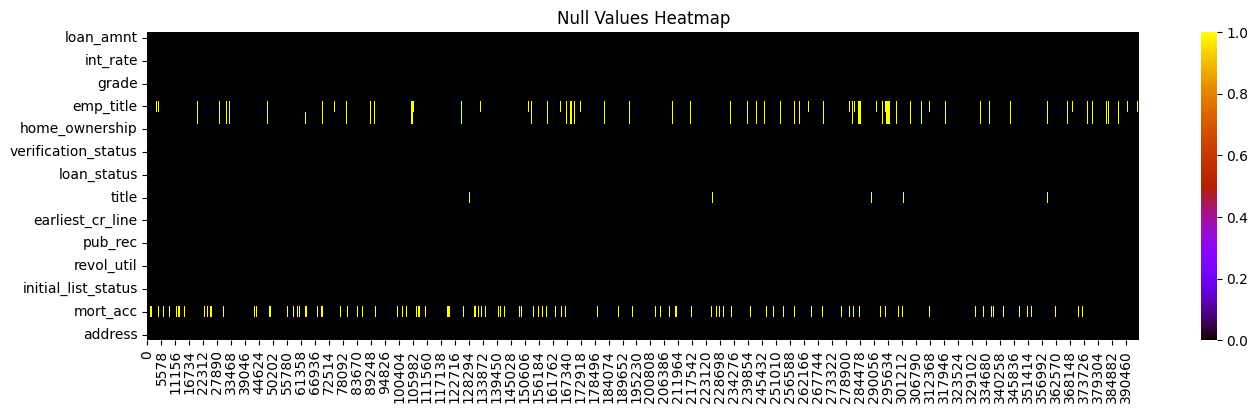

In [ ]:
# Null value heatmap:
plt.figure(figsize = (16,4))
sns.heatmap(data.isnull().T, cmap='gnuplot')
plt.title('Null Values Heatmap')
plt.show()

**🔍OBSERVATION🔎**

- **High Missing Percentage (>5%): might significantly impact the analysis**
    - **Columns:** mort_acc, emp_title
    - **Action:** Impute mort_acc with median and emp_title with mode.

- **Moderate Missing Percentage (1-5%):**
    - **Column:** emp_length
    - **Action:** Impute with mode.

- **Low Missing Percentage (<1%): may have a lesser impact.**
    - **Columns:** title, pub_rec_bankruptcies, revol_util
    - **Action:** Impute and with mode for title and pub_rec_bankruptcies median for revol_util.

**For mort_acc column:**

In [ ]:
# Find the column which is highly coorelated with mort_acc
correlation = numerical_df.corr()
correlation['mort_acc'].sort_values(ascending=False)

mort_acc                1.000000
total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

In [ ]:
# Find the median values by grouping total_acc
median_value = df.groupby('total_acc')['mort_acc'].median()
median_value

total_acc
2.0      0.0
3.0      0.0
4.0      0.0
5.0      0.0
6.0      0.0
        ... 
124.0    1.0
129.0    1.0
135.0    3.0
150.0    2.0
151.0    0.0
Name: mort_acc, Length: 118, dtype: float64

In [ ]:
# Functiion to impute the mort_acc with median values
def impute_mort_acc(total_acc, mort_acc):
  if pd.isnull(mort_acc):
    return median_value[total_acc]
  else:
    return mort_acc

In [ ]:
# Impute the mort_acc missing values by applying impute_mort_acc()
df['mort_acc'] = df.apply(lambda x: impute_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

**For emp_title', 'emp_length', 'title', 'pub_rec_bankruptcies columns:**

In [ ]:
# Impute the mode values for the following columns
columns_to_impute = ['emp_title', 'emp_length', 'title', 'pub_rec_bankruptcies']

for column in columns_to_impute:
  print(f"{column}'s mode values: {df[column].mode()[0]}")
  df[column].fillna(df[column].mode()[0], inplace=True)

emp_title's mode values: Teacher
emp_length's mode values: 10+ years
title's mode values: Debt consolidation
pub_rec_bankruptcies's mode values: 0.0


**For revol_util column:**

In [ ]:
# Fill the revol_util with median value
df['revol_util'].fillna(df['revol_util'].median(), inplace=True)

**Final check:**

In [ ]:
# Sanity check
missing_value = pd.DataFrame({'Missing Value': df.isnull().sum(), 'Percentage': (((df.isnull().sum() / len(df))*100)).round(2)})
missing_value.sort_values(by='Percentage', ascending=False)

,Missing Value,Percentage
loan_amnt,0,0.0
title,0,0.0
pub_rec_bankruptcies,0,0.0
mort_acc,0,0.0
application_type,0,0.0
initial_list_status,0,0.0
total_acc,0,0.0
revol_util,0,0.0
revol_bal,0,0.0
pub_rec,0,0.0


### <font color=#9F2B68>**9.3) Outlier detection🕵**</font>

#### <font color="#DA70D6">**9.3.1) Visualization Method**</font>



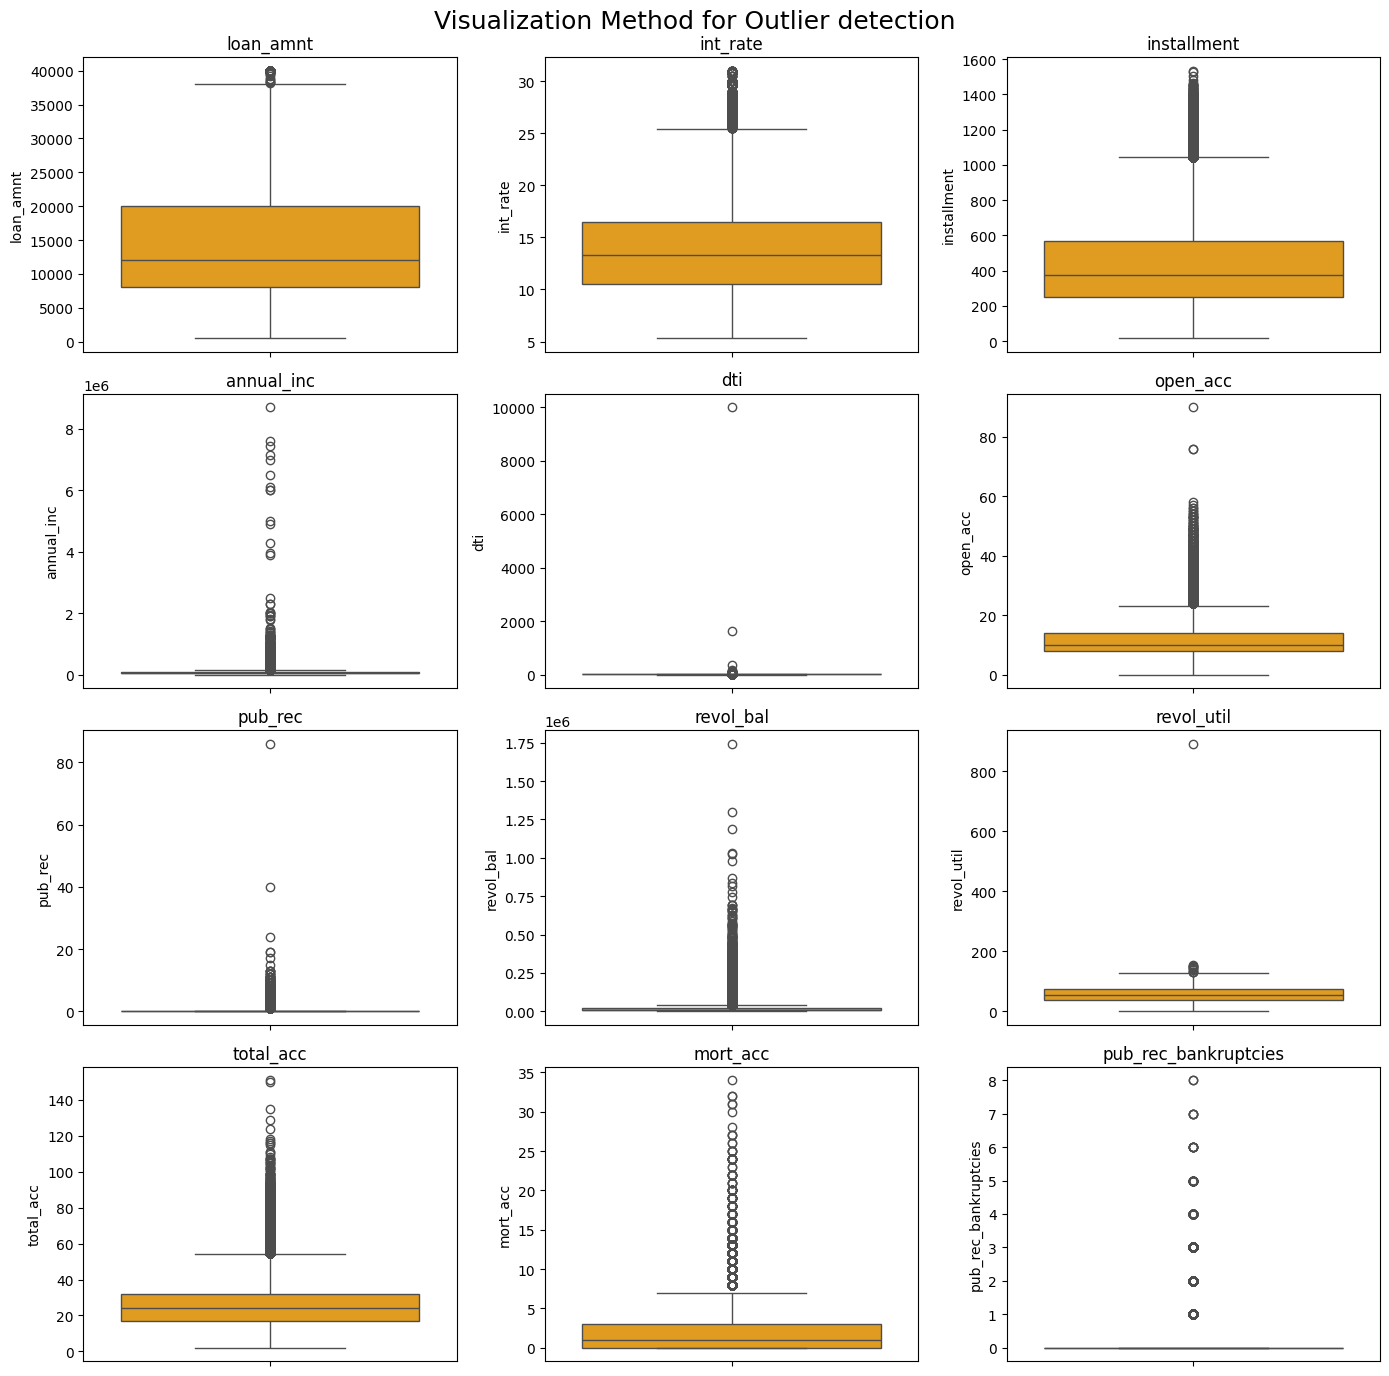

In [ ]:
# Visualization Method for Outlier detection
numerical_cols = numerical_df.columns

plt.figure(figsize=(14, 14))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i+1)
    sns.boxplot(df[col], color='orange')
    plt.title(col)

plt.suptitle("Visualization Method for Outlier detection", fontsize = 18)
plt.tight_layout()
plt.show()

#### <font color=#DA70D6>**9.3.2) Five point summery and percentage of outliers**</font>

In [ ]:
# Calculating the five point summery and Percentage of outliers for each numerical column
def detect_outliers(column):
  # Calculating the IQR:
  Q1 = np.percentile(df[column],25)
  median = np.percentile(df[column],50)
  Q3 = np.percentile(df[column],75)
  IQR = Q3 - Q1

  # Calculating the percentage of outliers:
  lower_bound = max(df[column].min(), Q1 - 1.5 * IQR)
  upper_bound = min(df[column].max(), Q3 + 1.5 * IQR)
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  percentage_outliers = (len(outliers)/len(data)) * 100
  print(f"For columns: {col}")
  print(f"Min Value: {df[column].min()}")
  print(f"Max Value: {df[column].max()}")
  print(f"1. Lower bound value: {lower_bound.round(2)} \n2. Q1: {Q1.round(2)} \n3. Median: {median.round(2)} \n4. Q3: {Q3.round(2)} \n5. Upper bound value: {upper_bound.round(2)} \n6. IQR: {IQR.round(2)}")
  return percentage_outliers

# UIterating the numerical columns:
for col in numerical_cols:
    percentage = detect_outliers(col)
    print(f"Percentage of outliers in column '{col}': {percentage:.2f}%")
    print("-" * 65)

For columns: loan_amnt
Min Value: 500.0
Max Value: 40000.0
1. Lower bound value: 500.0 
2. Q1: 8000.0 
3. Median: 12000.0 
4. Q3: 20000.0 
5. Upper bound value: 38000.0 
6. IQR: 12000.0
Percentage of outliers in column 'loan_amnt': 0.05%
-----------------------------------------------------------------
For columns: int_rate
Min Value: 5.32
Max Value: 30.99
1. Lower bound value: 5.32 
2. Q1: 10.49 
3. Median: 13.33 
4. Q3: 16.49 
5. Upper bound value: 25.49 
6. IQR: 6.0
Percentage of outliers in column 'int_rate': 0.95%
-----------------------------------------------------------------
For columns: installment
Min Value: 16.08
Max Value: 1533.81
1. Lower bound value: 16.08 
2. Q1: 250.33 
3. Median: 375.43 
4. Q3: 567.3 
5. Upper bound value: 1042.75 
6. IQR: 316.97
Percentage of outliers in column 'installment': 2.84%
-----------------------------------------------------------------
For columns: annual_inc
Min Value: 0.0
Max Value: 8706582.0
1. Lower bound value: 0.0 
2. Q1: 45000.0 
3.

**🔍OBSERVATION🔎**

According to the five point summery, the highest percentage of outliers in columns,

1. 'pub_rec' has 14.58%
2. 'pub_rec_bankruptcies' has 11.39%
3. revol_bal' has 5.37%
4. 'annual_inc' has 4.22%

#### <font color=#DA70D6>**9.3.3) IQR Method**</font>

- According to the nature of your dataset, which includes financial data with variables such as loan amounts, interest rates, and annual income, it is important to choose an outlier treatment method that is both effective and appropriate for the characteristics of this data. Financial data often contains natural variability and can have significant outliers due to varying customer profiles.

- The IQR method is robust and less sensitive to extreme values compared to methods based on mean and standard deviation, like the Z-score. The IQR method focuses on the middle 50% of the data, making it suitable for skewed distributions commonly seen in financial data.

#### <font color=#DA70D6>**9.3.4) Setting a threshold**</font>

In [ ]:
# Sum of outliers in each column
# Function to detect outliers using the IQR method
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
    return outliers

# outliers for each numerical column
outliers_pub_rec = detect_outliers_iqr(df['pub_rec'])
outliers_pub_rec_bankruptcies = detect_outliers_iqr(df['pub_rec_bankruptcies'])
outliers_revol_bal = detect_outliers_iqr(df['revol_bal'])
outliers_annual_inc = detect_outliers_iqr(df['annual_inc'])


# Combine outlier information into a DataFrame
outliers_combined = pd.DataFrame({
    'pub_rec': outliers_pub_rec,
    'pub_rec_bankruptcies': outliers_pub_rec_bankruptcies,
    'revol_bal': outliers_revol_bal,
    'annual_inc': outliers_annual_inc
})

# Check the number of outliers in each column
print("Sum of Outliers in the following  columns")
print("-" * 40)
outliers_combined.sum()

Sum of Outliers in the following  columns
----------------------------------------


pub_rec                 57758
pub_rec_bankruptcies    45115
revol_bal               21259
annual_inc              16700
dtype: int64

In [ ]:
# Among the outliers in outliers_pub_rec column the distribution of loan_status are as follows
(df.loc[outliers_pub_rec]['loan_status'].value_counts(normalize=True)*100).round(2)

loan_status
Fully Paid     78.65
Charged Off    21.35
Name: proportion, dtype: float64

In [ ]:
# Among the outliers in outliers_pub_rec_bankruptcies column the distribution of loan_status are as follows
(df.loc[outliers_pub_rec_bankruptcies]['loan_status'].value_counts(normalize=True)*100).round(2)

loan_status
Fully Paid     79.46
Charged Off    20.54
Name: proportion, dtype: float64

In [ ]:
# Among the outliers in outliers_revol_bal column the distribution of loan_status are as follows
(df.loc[outliers_revol_bal]['loan_status'].value_counts(normalize=True)*100).round(2)

loan_status
Fully Paid     82.24
Charged Off    17.76
Name: proportion, dtype: float64

In [ ]:
# Among the outliers in outliers_annual_inc column the distribution of loan_status are as follows
(df.loc[outliers_annual_inc]['loan_status'].value_counts(normalize=True)*100).round(2)

loan_status
Fully Paid     85.96
Charged Off    14.04
Name: proportion, dtype: float64

**🔍OBSERVATION🔎**

- The distribution shows that outliers in the pub_rec, pub_rec_bankruptcies, revol_bal and annual_inc column are more likely to be associated with the "Fully Paid" status. This could suggest that extreme values in this column might be associated with borrowers who have fully paid off their loans, indicating a potential pattern.

**To choose the appropriate quantile threshold (0.75, 0.95, 0.99),**

- 0.75 Quantile (25th percentile):
    - Using this quantile could be too restrictive and may not capture a broad range of outliers, potentially removing too many valid data points.

- 0.95 Quantile (95th percentile):
    - This is less restrictive and allows for a broader range of data while addressing most extreme outliers

- 0.99 Quantile (99th percentile):
    - This is useful onnly if you want to preserve as much data as possible and only cap the most extreme outliers.
  
We shall choose Quantile(0.95) is generally a good balance between handling extreme values and maintaining data quality.





#### <font color=#DA70D6>**9.3.5) Outlier Treatment - Quantile-Based Capping**</font>

In [ ]:
def cap_outliers(df, column, quantile=0.95):
    upper_bound = df[column].quantile(quantile)
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Creating a deep copy for backup
df_cleaned = df.copy()

# Apply the cap_outliers function to each numerical column
for col in numerical_cols:
    df_cleaned = cap_outliers(df_cleaned, col, 0.95)

### <font color=#9F2B68>**9.4) Feature engineering🪛🔩**</font>

#### <font color=#DA70D6>**9.4.1) Dealing with pub_rec and pub_rec_bankruptcies columns**</font>

In [ ]:
# Comparision of unique numbers in each numerical column after outlier treatment
print("Comparision of unique numbers in each numerical column after outlier treatment(capping)")
print("-" * 88)
for col in numerical_cols:
  print(f"{col}: {df[col].nunique()} --> {df_cleaned[col].nunique()}({df_cleaned[col].dtypes})")

Comparision of unique numbers in each numerical column after outlier treatment(capping)
----------------------------------------------------------------------------------------
loan_amnt: 1397 --> 1207(float64)
int_rate: 566 --> 464(float64)
installment: 55706 --> 51626(float64)
annual_inc: 27197 --> 25728(float64)
dti: 4262 --> 3159(float64)
open_acc: 61 --> 22(float64)
pub_rec: 20 --> 2(float64)
revol_bal: 55622 --> 39596(float64)
revol_util: 1226 --> 986(float64)
total_acc: 118 --> 46(float64)
mort_acc: 36 --> 10(float64)
pub_rec_bankruptcies: 9 --> 2(float64)


**🔍OBSERVATION🔎**

Lets convert the datatype to categorical for the following
- pub_rec: 20 --> 2(float64)
- pub_rec_bankruptcies: 9 --> 2(float64)

In [ ]:
# Convert columns to categorical
categorical_cols = ['pub_rec', 'pub_rec_bankruptcies']
for col in categorical_cols:
    df_cleaned[col] = df_cleaned[col].astype('category')

In [ ]:
# Sanity check
categorical_cols = ['pub_rec', 'pub_rec_bankruptcies']
for col in categorical_cols:
  print(f"{col}: {df_cleaned[col].unique()}, {df_cleaned[col].dtypes}")

pub_rec: [0.0, 1.0]
Categories (2, float64): [0.0, 1.0], category
pub_rec_bankruptcies: [0.0, 1.0]
Categories (2, float64): [0.0, 1.0], category


#### <font color=#DA70D6>**9.4.2) Dealing with issue_d and earliest_cr_line columns**</font>

In [ ]:
# Lets check the follwing columns
df_cleaned[['issue_d','earliest_cr_line']].head()

,issue_d,earliest_cr_line
0,2015-01-01,1990-06-01
1,2015-01-01,2004-07-01
2,2015-01-01,2007-08-01
3,2014-11-01,2006-09-01
4,2013-04-01,1999-03-01


In [ ]:
# Change the datatype
df_cleaned['issue_month'] = df_cleaned['issue_d'].dt.month.astype('category')
df_cleaned['issue_year'] = df_cleaned['issue_d'].dt.year.astype('category')

In [ ]:
# Change the datatype
df_cleaned['earliest_cr_line_month'] = df_cleaned['earliest_cr_line'].dt.month.astype('category')
df_cleaned['earliest_cr_line_year'] = df_cleaned['earliest_cr_line'].dt.year.astype('category')

In [ ]:
df_cleaned.drop(['issue_d', 'earliest_cr_line'], axis=1, inplace=True)

In [ ]:
# Sanity check
categorical_cols = ['issue_month', 'issue_year', 'earliest_cr_line_month', 'earliest_cr_line_year']
for col in categorical_cols:
  print(f"{col}: {df_cleaned[col].nunique()}, {df_cleaned[col].dtypes}")

issue_month: 12, category
issue_year: 10, category
earliest_cr_line_month: 12, category
earliest_cr_line_year: 65, category


#### <font color=#DA70D6>**9.4.3) Dealing with address column**</font>

In [ ]:
# Lets check the follwing columns
df_cleaned['address'].sample(5)

89558         0247 Payne Light\r\nNorth Scottport, RI 05113
377824           603 David Lodge\r\nWest Maryport, GA 22690
238173    857 Christy Passage Suite 169\r\nCindyburgh, N...
253728    332 Mooney Orchard Apt. 264\r\nWest Gerald, VT...
67883                           USS Sanders\r\nFPO AP 30723
Name: address, dtype: object

In [ ]:
# Extracting Sate and Zip from address column
df_cleaned[['state', 'zip_code']] = df_cleaned['address'].apply(lambda x: pd.Series([x[-8:-6], x[-5:]]))
df_cleaned.drop(['address'], axis=1, inplace=True)

In [ ]:
# Sanity check
df_cleaned[['state', 'zip_code']].sample(5)

,state,zip_code
102068,LA,30723
310226,AZ,48052
190087,UT,00813
289450,AL,00813
313877,MS,22690


In [ ]:
# Sanity check
df_cleaned[['state', 'zip_code']].isnull().sum()

state       0
zip_code    0
dtype: int64

In [ ]:
# Quick check
categorical_cols = ['state', 'zip_code']
for col in categorical_cols:
  print(f"{col}: {df_cleaned[col].nunique()}, {df_cleaned[col].dtypes}")

state: 54, object
zip_code: 10, object


In [ ]:
# Change the datatype since there are only 10 values
df_cleaned['zip_code'] = df_cleaned['zip_code'].astype('category')

In [ ]:
# Sanity check
categorical_cols = ['state', 'zip_code']
for col in categorical_cols:
  print(f"{col}: {df_cleaned[col].nunique()}, {df_cleaned[col].dtypes}")

state: 54, object
zip_code: 10, category


### <font color=#9F2B68>**9.5) Encoding 🔢💻**</font>

#### <font color=#DA70D6>**9.5.1) Plan for Encoding**</font>

In [ ]:
# Check
for col in df_cleaned.columns:
  print(f"{col}: {df_cleaned[col].nunique()}, {df_cleaned[col].dtypes}")

loan_amnt: 1207, float64
term: 2, category
int_rate: 464, float64
installment: 51626, float64
grade: 7, category
sub_grade: 35, category
emp_title: 173105, object
emp_length: 11, category
home_ownership: 6, category
annual_inc: 25728, float64
verification_status: 3, category
loan_status: 2, category
purpose: 14, category
title: 48816, object
dti: 3159, float64
open_acc: 22, float64
pub_rec: 2, category
revol_bal: 39596, float64
revol_util: 986, float64
total_acc: 46, float64
initial_list_status: 2, category
application_type: 3, category
mort_acc: 10, float64
pub_rec_bankruptcies: 2, category
issue_month: 12, category
issue_year: 10, category
earliest_cr_line_month: 12, category
earliest_cr_line_year: 65, category
state: 54, object
zip_code: 10, category


In [ ]:
# Label Encoding for Target feature
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target column
df_cleaned['loan_status'] = label_encoder.fit_transform(df_cleaned['loan_status'])

# Check the mapping
print(df_cleaned['loan_status'].value_counts())

loan_status
1    318357
0     77673
Name: count, dtype: int64


In [ ]:
# Calculate Stastistics and p-value for chi2_contingency
from scipy.stats import chi2_contingency

# Assumption:
'''
Ho: INDEPENDENT
Ha: NOT INDEPENDENT
'''
# chi2_contingency test
print("OBSERVATION:")
columns = df_cleaned.select_dtypes(include=['category','object']).columns
for col in columns:
  observed = pd.crosstab(df_cleaned[col], df_cleaned['loan_status'])
  chi_stat, p_value, dof, exp_freq = chi2_contingency(observed)

  # Conclusion
  if p_value < 0.05:
    result = "DEPENDENT with loaan status"
  else:
    result = "INDEPENDENT with loan status"

  # Print the result
  if result == "INDEPENDENT with loan status":
    print(f"- Drop the {col} since it is {result}")

OBSERVATION:
- Drop the emp_title since it is INDEPENDENT with loan status
- Drop the title since it is INDEPENDENT with loan status
- Drop the earliest_cr_line_month since it is INDEPENDENT with loan status
- Drop the state since it is INDEPENDENT with loan status


In [ ]:
# Drop the above mentioned columns
df_cleaned.drop(['emp_title', 'title', 'earliest_cr_line_month', 'state'], axis=1, inplace=True)

In [ ]:
# Check
for col in df_cleaned.columns:
  print(f"{col}: {df_cleaned[col].nunique()}, {df_cleaned[col].dtypes}")

loan_amnt: 1207, float64
term: 2, category
int_rate: 464, float64
installment: 51626, float64
grade: 7, category
sub_grade: 35, category
emp_length: 11, category
home_ownership: 6, category
annual_inc: 25728, float64
verification_status: 3, category
loan_status: 2, int64
purpose: 14, category
dti: 3159, float64
open_acc: 22, float64
pub_rec: 2, category
revol_bal: 39596, float64
revol_util: 986, float64
total_acc: 46, float64
initial_list_status: 2, category
application_type: 3, category
mort_acc: 10, float64
pub_rec_bankruptcies: 2, category
issue_month: 12, category
issue_year: 10, category
earliest_cr_line_year: 65, category
zip_code: 10, category


In [ ]:
# Check
for i, elem in (enumerate(df_cleaned.columns)):
  if df_cleaned[elem].dtypes != 'category':
    print(f"{i+1}. {elem}: {df_cleaned[elem].nunique(), df_cleaned[elem].dtypes}")

1. loan_amnt: (1207, dtype('float64'))
3. int_rate: (464, dtype('float64'))
4. installment: (51626, dtype('float64'))
9. annual_inc: (25728, dtype('float64'))
11. loan_status: (2, dtype('int64'))
13. dti: (3159, dtype('float64'))
14. open_acc: (22, dtype('float64'))
16. revol_bal: (39596, dtype('float64'))
17. revol_util: (986, dtype('float64'))
18. total_acc: (46, dtype('float64'))
21. mort_acc: (10, dtype('float64'))


In [ ]:
# Check
for i, elem in (enumerate(df_cleaned.columns)):
  if df_cleaned[elem].nunique() == 2 and df_cleaned[elem].dtype == 'category':
    print(f"{i+1}. {elem}: {df_cleaned[elem].nunique(), df_cleaned[elem].dtypes}")

2. term: (2, CategoricalDtype(categories=[' 36 months', ' 60 months'], ordered=False))
15. pub_rec: (2, CategoricalDtype(categories=[0.0, 1.0], ordered=False))
19. initial_list_status: (2, CategoricalDtype(categories=['f', 'w'], ordered=False))
22. pub_rec_bankruptcies: (2, CategoricalDtype(categories=[0.0, 1.0], ordered=False))


In [ ]:
# Check
for i, elem in (enumerate(df_cleaned.columns)):
  if df_cleaned[elem].dtypes == 'category' and df_cleaned[elem].nunique() > 2:
    print(f"{i+1}. {elem}: {df_cleaned[elem].nunique(), df_cleaned[elem].dtypes}")

5. grade: (7, CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G'], ordered=False))
6. sub_grade: (35, CategoricalDtype(categories=['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
                  'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5',
                  'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
                  'G1', 'G2', 'G3', 'G4', 'G5'],
, ordered=False))
7. emp_length: (11, CategoricalDtype(categories=['1 year', '10+ years', '2 years', '3 years', '4 years',
                  '5 years', '6 years', '7 years', '8 years', '9 years',
                  '< 1 year'],
, ordered=False))
8. home_ownership: (6, CategoricalDtype(categories=['ANY', 'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT'], ordered=False))
10. verification_status: (3, CategoricalDtype(categories=['Not Verified', 'Source Verified', 'Verified'], ordered=False))
12. purpose: (14, CategoricalDtype(categories=['car', 'credit_card', 'debt_consolidation', 'educational',

**🔍OBSERVATION🔎**

The Columns to be Performed under **One Hot Encoding**(No inherent order),
- home_ownership ('ANY', 'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT')
- verification_status ('Not Verified', 'Source Verified', 'Verified')
- purpose ('car', 'credit_card', ..., 'wedding')
- application_type ('DIRECT_PAY', 'INDIVIDUAL', 'JOINT')
- zip_code ( '00813', '05113', ..., '93700')

The Columns to be Performed under **Lable Encoding**(Binary or Order matters)

- term ('36 months', ' 60 months')
- pub_rec (0.0, 1.0)
- pub_rec_bankruptcies (0.0, 1.0)
- initial_list_status ('f', 'w')
- grade ('A', 'B', 'C', 'D', 'E', 'F', 'G')
- sub_grade ('A1', 'A2', ..., 'G5)
- emp_length ('1 year', '10+ years', ..., '< 1 year')
- issue_month (1 to 12)
- issue_year (10 Categories)
- earliest_cr_line_year (65 Categiries)


In [ ]:
df_nums = df_cleaned[['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status','dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc']]
df_nums.head()

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,open_acc,revol_bal,revol_util,total_acc,mort_acc
0,10000.0,11.44,329.48,117000.0,1,26.24,16.0,36369.0,41.8,25.0,0.0
1,8000.0,11.99,265.68,65000.0,1,22.05,17.0,20131.0,53.3,27.0,3.0
2,15600.0,10.49,506.97,43057.0,1,12.79,13.0,11987.0,92.0,26.0,0.0
3,7200.0,6.49,220.65,54000.0,1,2.60,6.0,5472.0,21.5,13.0,0.0
4,24375.0,17.27,609.33,55000.0,0,31.58,13.0,24584.0,69.8,43.0,1.0


In [ ]:
df_one_hot_encode = df_cleaned[['home_ownership', 'verification_status', 'purpose', 'application_type','zip_code']]
df_one_hot_encode.head()

,home_ownership,verification_status,purpose,application_type,zip_code
0,RENT,Not Verified,vacation,INDIVIDUAL,22690
1,MORTGAGE,Not Verified,debt_consolidation,INDIVIDUAL,05113
2,RENT,Source Verified,credit_card,INDIVIDUAL,05113
3,RENT,Not Verified,credit_card,INDIVIDUAL,00813
4,MORTGAGE,Verified,credit_card,INDIVIDUAL,11650


In [ ]:
# Creating one hot encode columns
one_hot_columns = df_one_hot_encode.columns

In [ ]:
df_label_encode = df_cleaned[['term','pub_rec', 'pub_rec_bankruptcies', 'initial_list_status', 'grade', 'sub_grade', 'emp_length', 'issue_month', 'issue_year', 'earliest_cr_line_year']]
df_label_encode.head()

,term,pub_rec,pub_rec_bankruptcies,initial_list_status,grade,sub_grade,emp_length,issue_month,issue_year,earliest_cr_line_year
0,36 months,0.0,0.0,w,B,B4,10+ years,1,2015,1990
1,36 months,0.0,0.0,f,B,B5,4 years,1,2015,2004
2,36 months,0.0,0.0,f,B,B3,< 1 year,1,2015,2007
3,36 months,0.0,0.0,f,A,A2,6 years,11,2014,2006
4,60 months,0.0,0.0,f,C,C5,9 years,4,2013,1999


In [ ]:
label_columns  = df_label_encode.columns

#### <font color=#DA70D6>**9.5.2) One Hot Encoding**</font>  

In [ ]:
print(one_hot_columns)
print(label_columns)

Index(['home_ownership', 'verification_status', 'purpose', 'application_type',
       'zip_code'],
      dtype='object')
Index(['term', 'pub_rec', 'pub_rec_bankruptcies', 'initial_list_status',
       'grade', 'sub_grade', 'emp_length', 'issue_month', 'issue_year',
       'earliest_cr_line_year'],
      dtype='object')


In [ ]:
# Apply One Hot Encoding
df_encoded = pd.get_dummies(df_cleaned, columns=one_hot_columns, drop_first=True)

# Convert boolean columns to integer
bool_columns = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)

In [ ]:
# Sanity check
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 52 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   loan_amnt                            396030 non-null  float64 
 1   term                                 396030 non-null  category
 2   int_rate                             396030 non-null  float64 
 3   installment                          396030 non-null  float64 
 4   grade                                396030 non-null  category
 5   sub_grade                            396030 non-null  category
 6   emp_length                           396030 non-null  category
 7   annual_inc                           396030 non-null  float64 
 8   loan_status                          396030 non-null  int64   
 9   dti                                  396030 non-null  float64 
 10  open_acc                             396030 non-null  float64 
 11  

#### <font color=#DA70D6>**9.5.3) Label Encoding**</font>



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding
for col in label_columns:
    # Initialize the LabelEncoder
    label_encoder = LabelEncoder()
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

In [ ]:
# Sanity check
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 52 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   term                                 396030 non-null  int64  
 2   int_rate                             396030 non-null  float64
 3   installment                          396030 non-null  float64
 4   grade                                396030 non-null  int64  
 5   sub_grade                            396030 non-null  int64  
 6   emp_length                           396030 non-null  int64  
 7   annual_inc                           396030 non-null  float64
 8   loan_status                          396030 non-null  int64  
 9   dti                                  396030 non-null  float64
 10  open_acc                             396030 non-null  float64
 11  pub_rec      

In [ ]:
# Sanity check
df_encoded.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,loan_status,dti,...,application_type_JOINT,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,10000.0,0,11.44,329.48,1,8,1,117000.0,1,26.24,...,0,0,0,1,0,0,0,0,0,0
1,8000.0,0,11.99,265.68,1,9,4,65000.0,1,22.05,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,0,10.49,506.97,1,7,10,43057.0,1,12.79,...,0,1,0,0,0,0,0,0,0,0
3,7200.0,0,6.49,220.65,0,1,6,54000.0,1,2.60,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,1,17.27,609.33,2,14,9,55000.0,0,31.58,...,0,0,1,0,0,0,0,0,0,0


### <font color=#9F2B68>**9.6) Train-Validation-Test-Split**</font> ✂



In [ ]:
# Lets split the data into Independent feature and dependent feature
y = df_encoded['loan_status']
X = df_encoded.drop('loan_status', axis = 1)
X.shape, y.shape

((396030, 51), (396030,))

Lets apply Cross Validation

In [ ]:
# Lets split the data into train and test
from sklearn.model_selection import train_test_split

# Split the data into training + validation and test sets (80% train+val, 20% test)
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Split the training + validation set into training and validation sets (80% of train+val for training, 20% for validation)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1, stratify=y_tr_cv)

In [ ]:
# Cross check
X_train.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,dti,open_acc,...,application_type_JOINT,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
370358,8000.0,0,11.99,265.68,1,7,0,40000.0,12.10,13.0,...,0,1,0,0,0,0,0,0,0,0
101447,30975.0,1,19.05,856.95,3,18,5,80000.0,13.28,8.0,...,0,1,0,0,0,0,0,0,0,0
333238,28000.0,1,21.97,780.84,4,24,4,100000.0,20.62,12.0,...,0,0,0,0,0,0,0,1,0,0
262303,8000.0,0,9.17,255.04,1,6,5,50000.0,1.90,8.0,...,0,0,0,0,0,1,0,0,0,0
178540,13000.0,0,14.09,444.88,1,9,2,50000.0,21.74,8.0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Lets check the shape of train and test data
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (237618, 51)
Shape of y_train: (237618,)
Shape of X_val: (79206, 51)
Shape of y_val: (79206,)
Shape of X_test: (79206, 51)
Shape of y_test: (79206,)


In [ ]:
# Lets the check the proportion of data
print(f"Percentage of Training data: {(X_train.shape[0] * 100)/ df_encoded.shape[0]}%")
print(f"Percentage of Validation data: {(X_val.shape[0] * 100)/ df_encoded.shape[0]}%")
print(f"Percentage of Test data: {(X_test.shape[0] * 100)/ df_encoded.shape[0]}%")

Percentage of Training data: 60.0%
Percentage of Validation data: 20.0%
Percentage of Test data: 20.0%


### <font color=#9F2B68>**9.7) Feature scaling📏**</font>

 - Standardization (Standard Scaling) would be an appropriate scaling method. This approach transforms the data to have a mean of 0 and a standard deviation of 1. It is particularly useful for datasets where the features have different units or ranges.

 - Standard Scaling is usually a good starting point, especially for algorithms like logistic regression, which assume normally distributed data. It helps in standardizing features, thus preventing the model from being biased towards features with larger scales.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test) # Lets kepp this aside and take at the final step after best model selection

Lets keep the test data aside and use test data only after we finalize the model.

## **10) Model Building🔷**

### <font color=#9F2B68>**10.1) Choosing the classification Metrix**</font>🎯

**Precision vs. Recall:**

> **High Precision Scenario:** If the financial institution is conservative and risk-averse, it might prioritize precision to ensure that loans are only granted to borrowers with a high likelihood of repaying. This approach minimizes potential losses from defaults but may result in rejecting some good borrowers (false negatives).

> **High Recall Scenario:** If the institution is focused on growth and can tolerate a certain level of risk, it might prioritize recall to maximize the identification of creditworthy borrowers. This approach may involve more false positives but ensures that fewer good borrowers are missed.

**Balanced Approach:** Often, a balanced approach considering both precision and recall is ideal.**The F1 score, which is the harmonic mean of precision and recall, can provide a single metric to balance these two aspects**. Additionally, setting appropriate thresholds or using cost-sensitive learning approaches can help balance the trade-offs between precision and recall.

### <font color=#9F2B68>**10.2) Checking about data imbalance**</font>

In [ ]:
data['loan_status'].value_counts(normalize=True)

loan_status
Fully Paid     0.803871
Charged Off    0.196129
Name: proportion, dtype: float64

In [ ]:
((y_train.value_counts(normalize=True)) * 100).round(2)

loan_status
1    80.39
0    19.61
Name: proportion, dtype: float64

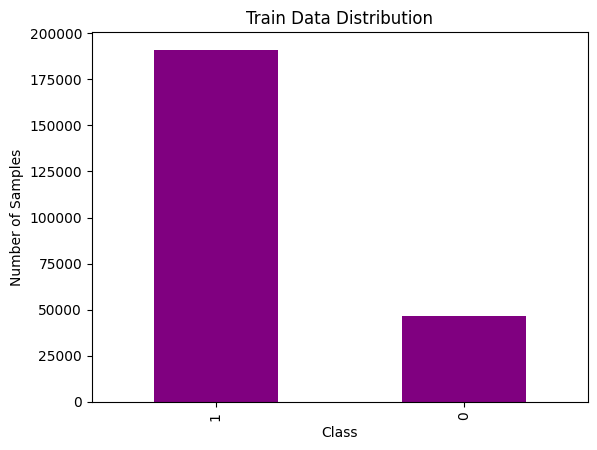

In [ ]:
y_train.value_counts().plot(kind='bar', color='purple')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Train Data Distribution')
plt.show()

**🔍OBSERVATION🔎**

Since the proportion of data is around 80% for 1 and 20% for class 0, we can conclude that the **data is imbalanced**.

### <font color=#9F2B68>**10.3) Base Model - Logistic Regression**</font>🖥

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
base_model = LogisticRegression(random_state=1)

# Fit the model on the training data
base_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

def model_performance(model, X_train_scaled, y_train, X_val_scaled, y_val):

  # Predict the values
  y_pred_train = model.predict(X_train_scaled)
  y_pred_val = model.predict(X_val_scaled)

  # Print the performance metrics
  print(f"Training Accuracy: {round(accuracy_score(y_train, y_pred_train),2)}")
  print(f"Training Precision: {round(precision_score(y_train, y_pred_train),2)}")
  print(f"Training Recall: {round(recall_score(y_train, y_pred_train),2)}")
  print(f"Training F1 Score: {round(f1_score(y_train, y_pred_train),2)}")
  print()
  print(f"Test Accuracy: {round(accuracy_score(y_val, y_pred_val),2)}")
  print(f"Test Precision: {round(precision_score(y_val, y_pred_val),2)}")
  print(f"Test Recall: {round(recall_score(y_val, y_pred_val),2)}")
  print(f"Test F1 Score: {round(f1_score(y_val, y_pred_val),2)}")

  # Confusion Matrix
  print("\nConfusion Matrix:")
  cm = confusion_matrix(y_val, y_pred_val)
  print(cm)

  ConfusionMatrixDisplay(cm).plot()
  plt.title('Confusion Matrix')
  plt.show()

  # Classification Report
  print("\nClassification Report:")
  print(classification_report(y_val, y_pred_val))

  return None

Base Model Performance:
-------------------------
Training Accuracy: 0.89
Training Precision: 0.89
Training Recall: 0.99
Training F1 Score: 0.93

Test Accuracy: 0.89
Test Precision: 0.89
Test Recall: 0.99
Test F1 Score: 0.93

Confusion Matrix:
[[ 7403  8131]
 [  662 63010]]


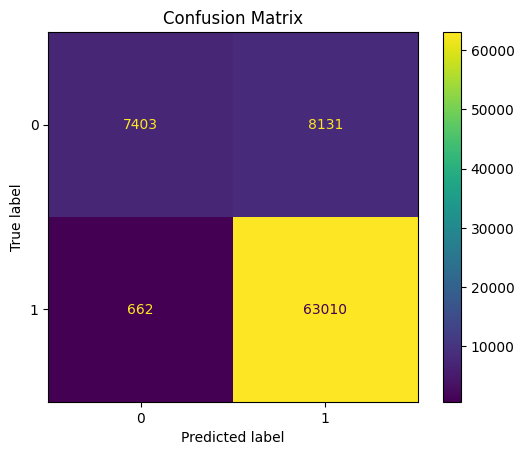


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.48      0.63     15534
           1       0.89      0.99      0.93     63672

    accuracy                           0.89     79206
   macro avg       0.90      0.73      0.78     79206
weighted avg       0.89      0.89      0.87     79206



In [ ]:
# Calling the function model_performance()
print("Base Model Performance:")
print("-" * 25)
model_performance(base_model, X_train_scaled, y_train, X_val_scaled, y_val)

**🔍OBSERVATION🔎**
- High recall (0.99) suggests the model is very good at identifying positive cases.
- Precision (0.89) indicates a good proportion of predicted positives are true positives.
- High F1 score (0.93) reflects a strong balance between precision and recall.

**Business Implications:**
- High recall is crucial in scenarios where missing a positive case (such as a defaulting borrower) could be costly. This model minimizes false negatives.
- However, the moderate precision may result in a higher number of false positives, potentially increasing unnecessary scrutiny on non-defaulting borrowers.

#### <font color=#DA70D6>**10.3.1) PR Curve Base Model**</font>

Since the proportion of data is imbalanced lets us perform AUC-PR curve

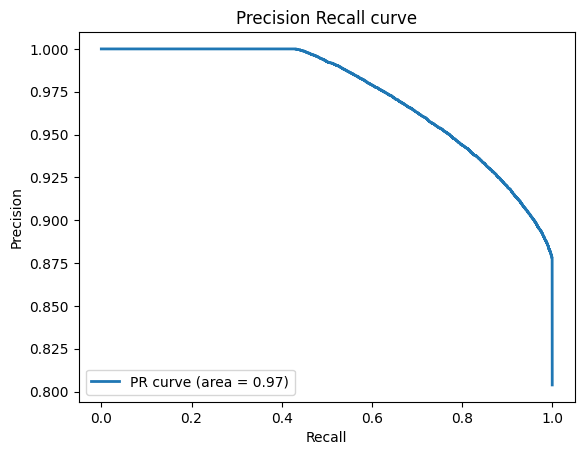

In [ ]:
# Hyperparameter tuning of Threshold
from sklearn.metrics import precision_recall_curve, auc

# Compute predicted probabilities
y_pred_prob_val = base_model.predict_proba(X_val_scaled)[:, 1]

# Get precision, recall, and thresholds
precision, recall, thres = precision_recall_curve(y_val, y_pred_prob_val)
auc_score = auc(recall, precision)

# Plot PR Curve
plt.figure()
plt.plot(recall, precision, lw=2, label='PR curve (area = %0.2f)' % auc_score)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall curve')
plt.legend(loc="lower left")
plt.show()

**Find the Optimal threshold**

From the business domain we should ask about this recall. Lets us consider recall should be greaterthan 0.8

In [ ]:
# Find the Optimal threshold
x = 0.8 # Get the input from the business domain
recall > x

# Find the correct threshold when recall > 0.8 and maximum precision
Optimal_threshold = thres[np.argmax(precision[recall > 0.8])]
max_precision = precision[np.argmax(precision[recall > 0.8])]
auc_score = auc(recall, precision)

# Print the result
print(f"For Recall > {x},")
print(f"Maximum Precision is: {(max_precision).round(2)}")
print(f"Optimal Threshold is: {(Optimal_threshold).round(2)}")
print(f"AUC Score: {(auc_score).round(2)}")

For Recall > 0.8,
Maximum Precision is: 0.94
Optimal Threshold is: 0.81
AUC Score: 0.97


Base Model Performance after customizing the threshold:
----------------------------------------------------------
Test Accuracy: 0.8
Test Precision: 0.94
Test Recall: 0.8
Test F1 Score: 0.87

Confusion Matrix:
[[12506  3028]
 [12725 50947]]


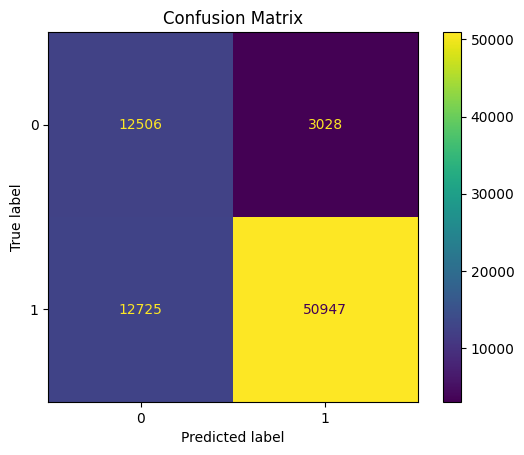

In [ ]:
# Model Performance after custamizing the threshold:
y_pred_custom_threshold = (y_pred_prob_val >= Optimal_threshold).astype(int)

print("Base Model Performance after customizing the threshold:")
print("-" * 58)
print(f"Test Accuracy: {round(accuracy_score(y_val, y_pred_custom_threshold),2)}")
print(f"Test Precision: {round(precision_score(y_val, y_pred_custom_threshold),2)}")
print(f"Test Recall: {round(recall_score(y_val, y_pred_custom_threshold),2)}")
print(f"Test F1 Score: {round(f1_score(y_val, y_pred_custom_threshold),2)}")

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_val, y_pred_custom_threshold)
print(cm)

ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix')
plt.show()

**🔍OBSERVATION🔎**
- Precision increases to 0.94, indicating fewer false positives.
- Recall decreases to 0.80, suggesting more false negatives.
- F1 score drops to 0.87, indicating a trade-off between precision and recall.

**Business Implications:**
- Higher precision means more accurate identification of actual defaulters, which can reduce costs associated with unnecessary actions against non-defaulting borrowers.
- Lower recall might lead to missing out on some defaulters, which could increase the risk of defaults going undetected.

### <font color=#9F2B68>**10.4) Handling Imbalance Data - Class Weight**</font>

- Class weight is a technique used in machine learning, particularly in classification problems, to handle imbalanced datasets. When one class (the majority class) has significantly more samples than another class (the minority class), the model may become biased towards predicting the majority class, leading to poor performance in identifying the minority class.

- It helps improve the model's sensitivity to the minority class by adjusting the loss function or decision criteria during training. However, it requires careful consideration to balance the weights appropriately and avoid overfitting or underfitting.

In [ ]:
# Value counts
y_train.value_counts()

loan_status
1    191014
0     46604
Name: count, dtype: int64

In [ ]:
# Calculte Wi
(y_train.value_counts().values[0] / y_train.value_counts().values[1]).round(2)

4.1

**🔍OBSERVATION🔎**

The training data:
- Fully Paid (1) = 191014
- Charged Off (0) = 46604

Hence weightage parameter becomes:
- $W_i = \frac{191014}{46604} = 4.1$

<br>


**Where should this weightage parameter be added to in the model🤔?**

Ans: Since Imbalance data effects the logloss the most,
- We add this weightage parameter ($W_i$) to the loss function such that:

  - $Loss = \frac{1}{n}[\sum_{i=1}^{n} logloss_i \times W_i + \lambda \sum_{j=1}^{d} w_j^2 ]$

<br>

Here:
-  $W_i = 4.1$ for Charged Off(0) (Minority class)
-  $W_i = 1$ for Fully Paid (1) (Majority class)

**note** This **weightage parameter($W_i$) is called Class weight**

In [ ]:
# Minority class needs more re-weighting
class_weights_model = LogisticRegression(class_weight={0:4.1, 1:1}, random_state=1)

# Fit the model on the training data
class_weights_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight={0: 4.1, 1: 1}, random_state=1)

Class weight Model Performance:
---------------------------------
Training Accuracy: 0.81
Training Precision: 0.94
Training Recall: 0.81
Training F1 Score: 0.87

Test Accuracy: 0.81
Test Precision: 0.94
Test Recall: 0.81
Test F1 Score: 0.87

Confusion Matrix:
[[12334  3200]
 [11995 51677]]


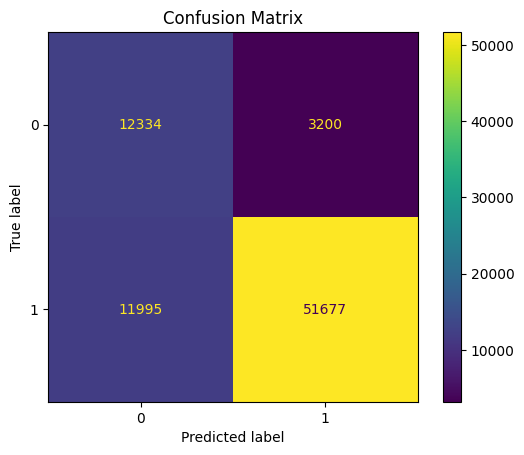


Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.79      0.62     15534
           1       0.94      0.81      0.87     63672

    accuracy                           0.81     79206
   macro avg       0.72      0.80      0.75     79206
weighted avg       0.86      0.81      0.82     79206



In [ ]:
# Calling the function model_performance()
print("Class weight Model Performance:")
print("-" * 33)
model_performance(class_weights_model, X_train_scaled, y_train, X_val_scaled, y_val)

**🔍OBSERVATION🔎**
- Precision is high at 0.94, with recall at 0.81.
- F1 score (0.87) shows a good balance, slightly favoring precision.
- Accuracy drops to 0.81, reflecting a shift in handling class imbalance.

**Business Implications:**
- Similar to the customized threshold in the base model, high precision reduces the number of false positives, beneficial for efficient resource allocation.
- The relatively lower recall still risks missing some defaulters, requiring a careful analysis of the cost implications.

#### <font color=#DA70D6>**10.4.1) ROC AUC curve for Class Weight Model**</font>

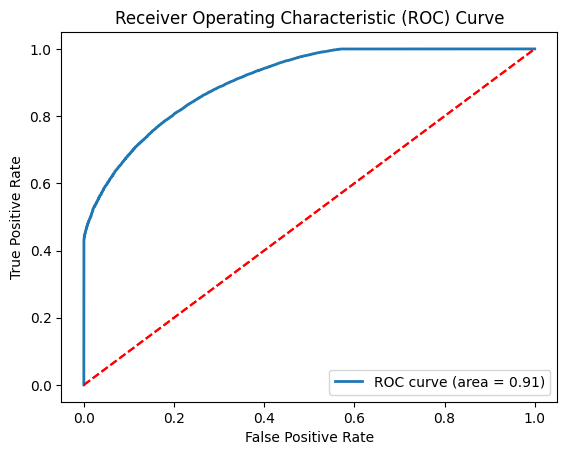

In [ ]:
# Hyperparameter tuning of Threshold
from sklearn.metrics import roc_curve, roc_auc_score

# Predict the probabilities for the positive class
y_pred_prob_val = class_weights_model.predict_proba(X_val_scaled)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob_val)
roc_auc = roc_auc_score(y_val, y_pred_prob_val)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.plot(fpr,fpr,'--',color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Find the Optimal threshold**

From the business domain we should ask about this FPR. Lets us consider FPR < 0.2

In [ ]:
# Find the Optimal threshold
x = 0.2
fpr < x # Get the input from the business domain

# Find the correct threshold when fpr < 0.2 and maximum tpr
Optimal_threshold = thresholds[np.argmax(tpr[fpr < 0.2])]
max_tpr = tpr[np.argmax(tpr[fpr < 0.2])]
roc_auc = roc_auc_score(y_val, y_pred_prob_val)

# Print the result
print(f"For FPR < {x},")
print(f"Maximum TPR is: {(max_tpr).round(2)}")
print(f"Optimal Threshold is: {(Optimal_threshold).round(2)}")
print(f"AU-ROC Score: {(roc_auc).round(2)}")

For FPR < 0.2,
Maximum TPR is: 0.81
Optimal Threshold is: 0.51
AU-ROC Score: 0.91


Class weight Model Performance after customizing the threshold:
-----------------------------------------------------------------
Test Accuracy: 0.8
Test Precision: 0.94
Test Recall: 0.81
Test F1 Score: 0.87

Confusion Matrix:
[[12428  3106]
 [12350 51322]]


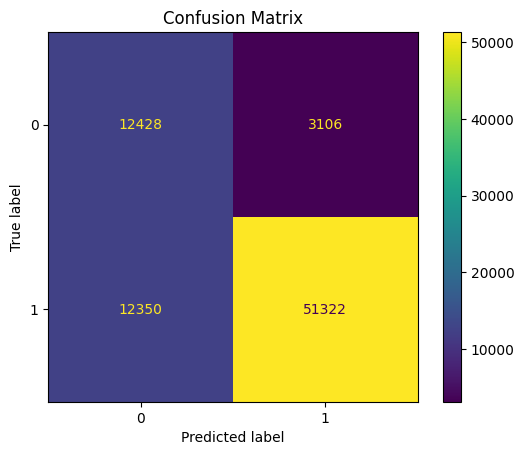

In [ ]:
# Model Performance after custamizing the threshold:
y_pred_custom_threshold = (y_pred_prob_val >= Optimal_threshold).astype(int)

print("Class weight Model Performance after customizing the threshold:")
print("-" * 65)
print(f"Test Accuracy: {round(accuracy_score(y_val, y_pred_custom_threshold),2)}")
print(f"Test Precision: {round(precision_score(y_val, y_pred_custom_threshold),2)}")
print(f"Test Recall: {round(recall_score(y_val, y_pred_custom_threshold),2)}")
print(f"Test F1 Score: {round(f1_score(y_val, y_pred_custom_threshold),2)}")

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_val, y_pred_custom_threshold)
print(cm)

ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix')
plt.show()

**🔍OBSERVATION🔎**
- Precision remains high at 0.94, with a recall of 0.81.
- The F1 score is consistent at 0.87, similar to the non-threshold-adjusted class weight model.
- Accuracy remains at 0.80.

**Business Implications:**
- Consistent precision with a slight drop in recall suggests the threshold adjustment had minimal impact on the model's trade-off balance.
- The business may still face risks related to missed defaulters due to the recall rate.

### <font color=#9F2B68>**10.5) Handling Imbalance Data - SMOTE**</font>




 - SMOTE(Synthetically Minority Oversampling Technique) helps in balancing the class distribution by generating synthetic instances of the minority class, which can improve the performance of classification algorithms.

 -  By creating synthetic samples, SMOTE can help algorithms learn more generalized decision boundaries, reducing the bias towards the majority class.

In [ ]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smt = SMOTE()

# Check the value counts before SMOTE
print('Before SMOTE')
print(y_train.value_counts())
print()

# Perform SMOTE on the training data
# Oversample the training data using SMOTE
X_sm, y_sm = smt.fit_resample(X_train_scaled, y_train)

print('After Oversampling')
print(y_sm.value_counts())
print()

Before SMOTE
loan_status
1    191014
0     46604
Name: count, dtype: int64

After Oversampling
loan_status
1    191014
0    191014
Name: count, dtype: int64



In [ ]:
# Initialize the Logistic Regression model
SMOTE_model = LogisticRegression(random_state=1)

# Fit the model on the training data
SMOTE_model.fit(X_sm, y_sm)

LogisticRegression(random_state=1)

SMOTE Model Performance:
-------------------------
Training Accuracy: 0.81
Training Precision: 0.81
Training Recall: 0.81
Training F1 Score: 0.81

Test Accuracy: 0.81
Test Precision: 0.94
Test Recall: 0.81
Test F1 Score: 0.87

Confusion Matrix:
[[12335  3199]
 [12129 51543]]


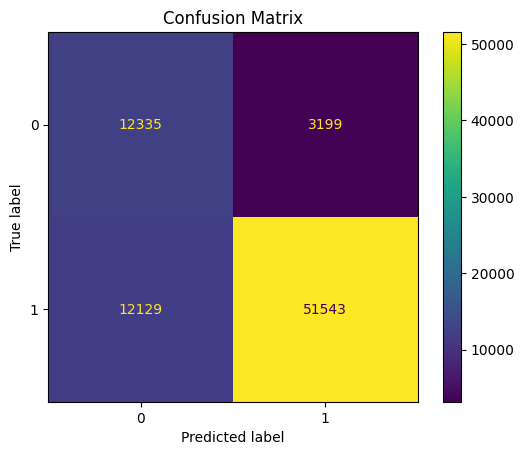


Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.79      0.62     15534
           1       0.94      0.81      0.87     63672

    accuracy                           0.81     79206
   macro avg       0.72      0.80      0.74     79206
weighted avg       0.86      0.81      0.82     79206



In [ ]:
# Calling the function model_performance()
print("SMOTE Model Performance:")
print("-" * 25)
model_performance(SMOTE_model, X_sm, y_sm, X_val_scaled, y_val)

**🔍OBSERVATION🔎**
- The model achieves balanced precision (0.81) and recall (0.81).
- F1 score (0.81) indicates a balanced but lower overall performance compared to other models.
- Accuracy is consistent with the class weight models at 0.81.

**Business Implications:**

- Balanced precision and recall mean the model handles class imbalance well, but with moderate precision, there's a risk of false positives.
- The moderate recall suggests some defaulters might still be missed, although it might be more balanced than other approaches.

#### <font color=#DA70D6>**10.5.1) ROC AUC curve for SMOTE Model**</font>

The ROC AUC curve (Receiver Operating Characteristic - Area Under the Curve) is a performance measurement for classification problems at various threshold settings. It's particularly useful for evaluating the performance of a binary classifier.

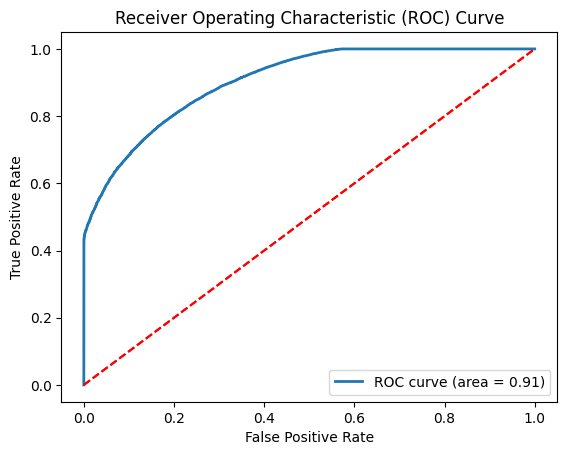

In [ ]:
# Hyperparameter tuning of Threshold
from sklearn.metrics import roc_curve, roc_auc_score

# Predict the probabilities for the positive class
y_pred_prob_val = SMOTE_model.predict_proba(X_val_scaled)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob_val)
roc_auc = roc_auc_score(y_val, y_pred_prob_val)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.plot(fpr,fpr,'--',color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Find the Optimal threshold**

From the business domain we should ask about this FPR. Lets us consider FPR < 0.2

In [ ]:
# Find the Optimal threshold
x = 0.2
fpr < x # Get the input from the business domain

# Find the correct threshold when fpr < 0.2 and maximum tpr
Optimal_threshold = thresholds[np.argmax(tpr[fpr < 0.2])]
max_tpr = tpr[np.argmax(tpr[fpr < 0.2])]
roc_auc = roc_auc_score(y_val, y_pred_prob_val)

# Print the result
print(f"For FPR < {x},")
print(f"Maximum TPR is: {(max_tpr).round(2)}")
print(f"Optimal Threshold is: {(Optimal_threshold).round(2)}")
print(f"AU-ROC Score: {(roc_auc).round(2)}")

For FPR < 0.2,
Maximum TPR is: 0.8
Optimal Threshold is: 0.51
AU-ROC Score: 0.91


SMOTE Model Performance after customizing the threshold:
----------------------------------------------------------
Test Accuracy: 0.8
Test Precision: 0.94
Test Recall: 0.8
Test F1 Score: 0.87

Confusion Matrix:
[[12428  3106]
 [12470 51202]]


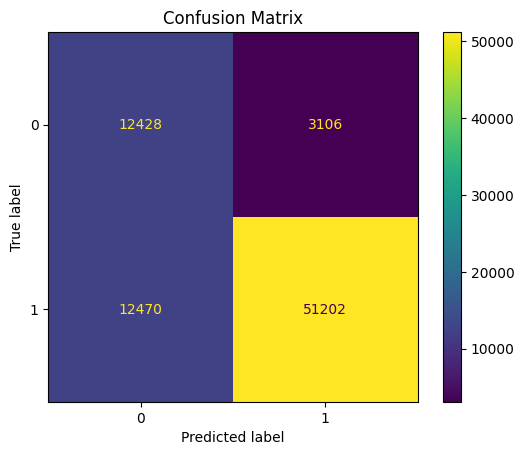

In [ ]:
# Model Performance after custamizing the threshold:
y_pred_custom_threshold = (y_pred_prob_val >= Optimal_threshold).astype(int)

print("SMOTE Model Performance after customizing the threshold:")
print("-" * 58)
print(f"Test Accuracy: {round(accuracy_score(y_val, y_pred_custom_threshold),2)}")
print(f"Test Precision: {round(precision_score(y_val, y_pred_custom_threshold),2)}")
print(f"Test Recall: {round(recall_score(y_val, y_pred_custom_threshold),2)}")
print(f"Test F1 Score: {round(f1_score(y_val, y_pred_custom_threshold),2)}")

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_val, y_pred_custom_threshold)
print(cm)

ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix')
plt.show()

**🔍OBSERVATION🔎**
- Precision increases to 0.94, with recall dropping to 0.80.
- The F1 score remains at 0.87, showing a preference for precision.
- Accuracy is consistent with the other threshold-adjusted models at 0.80.

**Business Implications:**

- The higher precision reduces false positives, aligning with the business need to minimize unnecessary actions on non-defaulting borrowers.
- However, the drop in recall may lead to some missed defaulters, presenting a risk that needs to be managed.

### <font color=#9F2B68>**10.6) Conclusion: Best Model Selection🟩**</font>

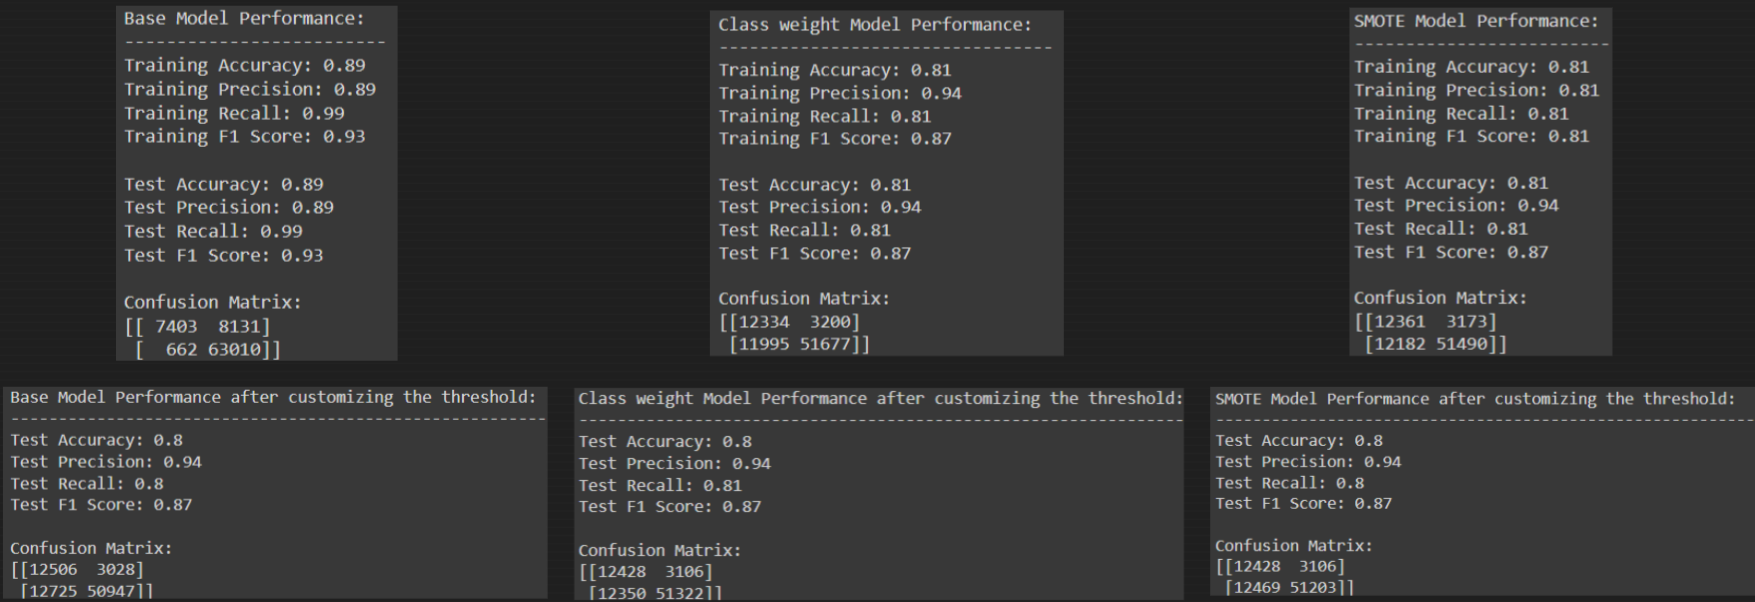

- Based on the analysis, 🤑**the Class Weight Model with Customized Threshold of 0.51 is recommended for further analysis**💪 This model achieves a high precision of 0.94, which is crucial for minimizing false positives. This is particularly important in credit risk analysis, where falsely classifying a non-defaulting borrower as a defaulter can lead to significant financial implications and customer dissatisfaction.

- The slight decrease in recall to 0.81 is a trade-off but can be acceptable depending on the business's risk tolerance. The chosen model offers a good balance between identifying true defaulters and minimizing the impact of false positives. Further analysis on the X_test data will help validate these findings and ensure the model's robustness in unseen scenarios.


### <font color=#9F2B68>**10.7) Final Check with X_test data🎯**</font>

In [ ]:
# Predict the probabilities
y_pred_prob_test = class_weights_model.predict_proba(X_test_scaled)[:, 1]

Final Model Performance with customized threshold 0.51 of test data:
--------------------------------------------------------------------
Test Accuracy: 0.8
Test Precision: 0.95
Test Recall: 0.8
Test F1 Score: 0.87

Confusion Matrix:
[[12573  2962]
 [12587 51084]]


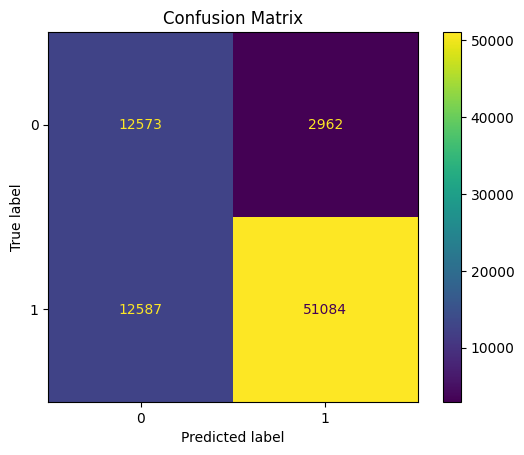

In [ ]:
# Final Test Performance after using the custamized threshold:
Optimal_threshold = 0.51

y_pred_custom_threshold = (y_pred_prob_test >= Optimal_threshold).astype(int)

print(f"Final Model Performance with customized threshold({Optimal_threshold}) of test data:")
print("-" * 70)
print(f"Test Accuracy: {round(accuracy_score(y_test, y_pred_custom_threshold),2)}")
print(f"Test Precision: {round(precision_score(y_test, y_pred_custom_threshold),2)}")
print(f"Test Recall: {round(recall_score(y_test, y_pred_custom_threshold),2)}")
print(f"Test F1 Score: {round(f1_score(y_test, y_pred_custom_threshold),2)}")

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_custom_threshold)
print(cm)

ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix')
plt.show()

**Conclusion😀**
- The "Final Model Performance with Customized Threshold of Test Data" is a robust model with a **strong emphasis on precision and robust F1 score**, ensuring that most of the predicted defaulters are indeed true defaulters. While there is a trade-off with recall, the model's configuration aligns well with the business goal of minimizing false positives with better trade-off with recall, which can be more costly or damaging in this context.

- This model should be used for further deployment and monitoring. However, it may be beneficial to regularly review and potentially adjust the model, especially if the business context or the underlying data distribution changes over time.

#### <font color=#DA70D6>**10.7.1) Feature importance**</font>

In [ ]:
# Extracting columns and Coefficients
feature_names = X_train.columns
importances = class_weights_model.coef_[0]

In [ ]:
# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

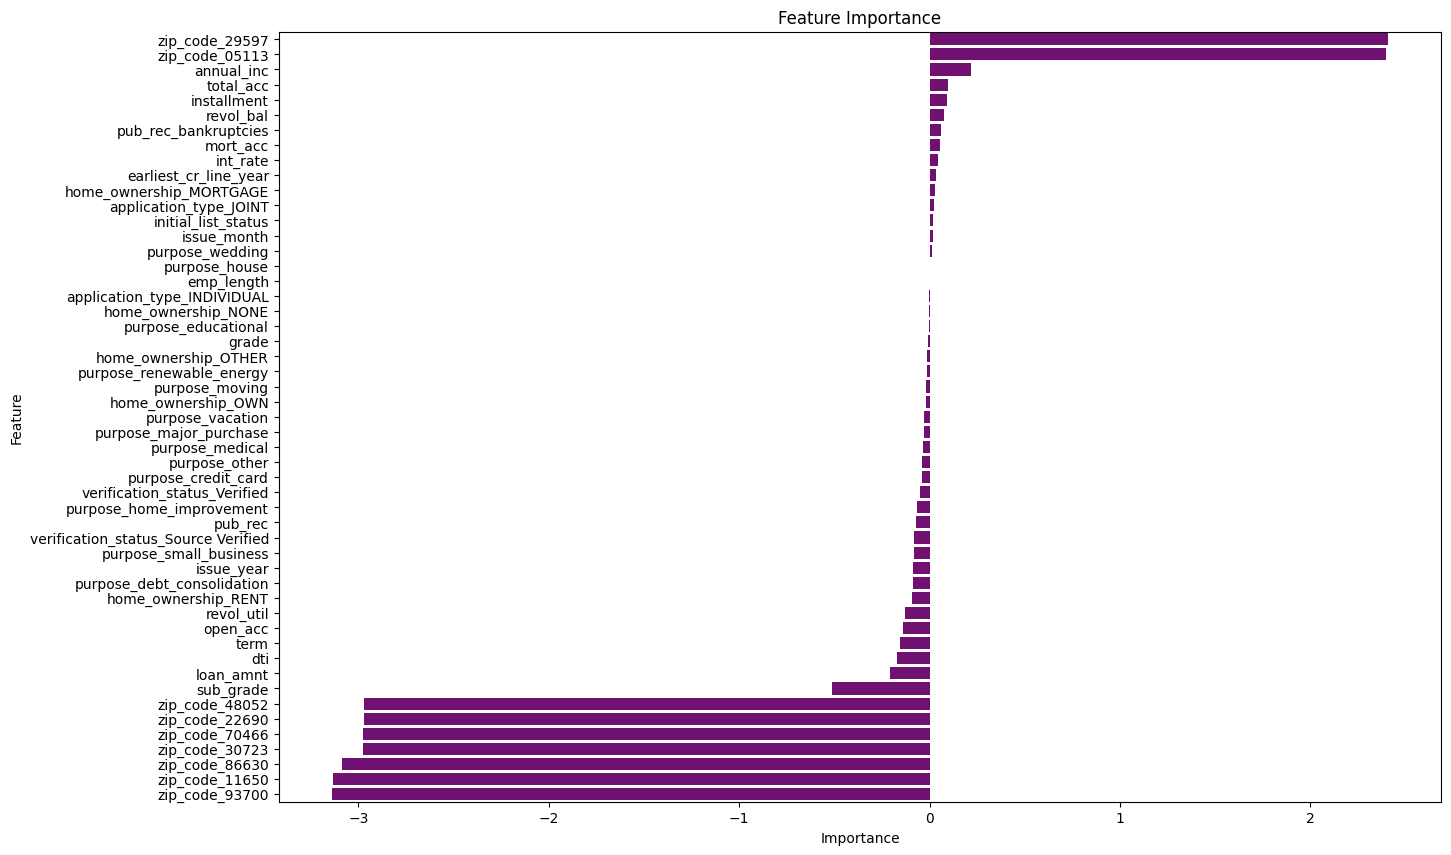

In [ ]:
# Plot the feature importances
plt.figure(figsize=(15, 10))

sns.barplot(y = feature_importance_df['Feature'], x = feature_importance_df['Importance'], color='purple')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

**Tradeoff Questions:**

> **Q1)** How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

**Ans:** To ensure the model accurately detects real defaulters with fewer false positives, we can fine-tune the decision threshold to balance precision and recall effectively. Additionally, incorporating more relevant features and regularly updating the model with new data can improve its predictive accuracy

> **Q2)** ince NPA (non-performing asset) is a real problem in this industry, it's important we play safe and shouldn't disburse loans to anyone.

**Ans:** In addressing the risk of non-performing assets (NPA), we can adopt a conservative approach by setting a higher decision threshold, prioritizing precision over recall to avoid false negatives. This cautious strategy ensures that loans are disbursed to individuals with a lower risk of default, protecting the institution from potential losses.

## **11) Questionnaire❓**

### <font color=#9F2B68>**Q) What percentage of customers have fully paid their Loan Amount?**</font>

In [ ]:
((df['loan_status'].value_counts(normalize=True))*100).round(2)

loan_status
Fully Paid     80.39
Charged Off    19.61
Name: proportion, dtype: float64

👉 80% of customers have fully paid their loan amount.

### <font color=#9F2B68>**Q) Comment about the correlation between Loan Amount and Installment features?**</font>

In [ ]:
(numerical_df.corr()['loan_amnt']['installment']).round(2)

0.95

👉 The high correlation coefficient of 0.95 between loan_amnt and installment suggests a strong positive linear relationship between these two variables. This indicates that as the loan amount increases, the installment amount also increases proportionally.

### <font color=#9F2B68>**Q) The majority of people have home ownership as?**</font>



In [ ]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

👉 The majority of people have home ownership as Mortgage

### <font color=#9F2B68>**Q) People with grades 'A' are more likely to fully pay their loan?**</font>



In [ ]:
((df[['loan_status','grade']].value_counts(normalize=True))*100).round(2)

loan_status  grade
Fully Paid   B        25.61
             C        21.09
             A        15.19
             D        11.41
Charged Off  C         5.67
Fully Paid   E         4.98
Charged Off  D         4.63
             B         3.68
             E         2.97
Fully Paid   F         1.70
Charged Off  F         1.27
             A         1.02
Fully Paid   G         0.40
Charged Off  G         0.37
Name: proportion, dtype: float64

In [ ]:
((pd.crosstab(df['grade'], df['loan_status'],normalize=True))*100).round(2)

loan_status,Charged Off,Fully Paid
grade,,
A,1.02,15.19
B,3.68,25.61
C,5.67,21.09
D,4.63,11.41
E,2.97,4.98
F,1.27,1.70
G,0.37,0.40


👉 False, People with grades 'A' are not more likely to fully paid their loan. People with grades 'B' are more lkely to be fully paid.

### <font color=#9F2B68>**Q) Name the top 2 afforded job titles?**</font>




In [ ]:
df['emp_title'].value_counts().to_frame().head()

,count
emp_title,
Teacher,27316
Manager,4250
Registered Nurse,1856
RN,1846
Supervisor,1830


In [ ]:
((df[['loan_status','emp_title']].value_counts(normalize=True))*100).round(2)

loan_status  emp_title                         
Fully Paid   Teacher                               5.18
Charged Off  Teacher                               1.72
Fully Paid   Manager                               0.84
             Registered Nurse                      0.37
             RN                                    0.37
                                                   ... 
             Contract Driver                       0.00
             Contract Engineer                     0.00
             Contract Executive                    0.00
             Contract Infrastructure Specialist    0.00
             ​License Compliance Investigator      0.00
Name: proportion, Length: 185292, dtype: float64

👉 Teacher: This job title has the highest proportion of individuals who have fully paid their loans, with a ratio of 5.18. This suggests that teachers are more likely to have fully paid their loans compared to other job titles.

👉 Manager: The second highest proportion is for managers, with a ratio of 0.84. Managers are also among the job titles with a higher likelihood of fully paying their loans

### <font color=#9F2B68>**Q) Thinking from a bank's perspective, which metric should our primary focus be on?**
> <font color=#9F2B68>**1. ROC AUC**</font>

> <font color=#9F2B68>**2. Precision**</font>

> <font color=#9F2B68>**3. Recall**</font>

> <font color=#9F2B68>**4. F1 Score**</font>



👉 Choosing the right metric depends on the business priorities. **Precision** should be the primary focus from a risk management perspective. Ensuring high precision helps the bank avoid approving risky loans and potential financial losses. However, an optimal balance using metrics like the **F1 Score** could also be considered to capture both aspects effectively.

### <font color=#9F2B68>**Q) How does the gap in precision and recall affect the bank?**</font>



👉 High Precision and Low Recall: The bank approves fewer loans, but those approved are more likely to be fully repaid. However, many potentially creditworthy borrowers might be missed, resulting in lost opportunities and reduced revenue.

👉 High Recall and Low Precision: The bank approves more loans, capturing most potential defaulters. This increases the risk of loan defaults, leading to higher financial losses and potentially impacting profitability.

👉 In essence, a large gap indicates a trade-off between reducing financial risk and maximizing loan approvals. Balancing precision and recall is crucial to optimize both profitability and risk management.

### <font color=#9F2B68>**Q) Which were the features that heavily affected the outcome?**</font>




In [ ]:
feature_importance_df['Abs_Importance'] = abs(feature_importance_df['Importance'])
Abs_Importance_df = feature_importance_df.sort_values(['Abs_Importance'], ascending=False)

In [ ]:
Abs_Importance_df.head()

,Feature,Importance,Abs_Importance
50,zip_code_93700,-3.140823,3.140823
43,zip_code_11650,-3.132762,3.132762
49,zip_code_86630,-3.085315,3.085315
46,zip_code_30723,-2.976033,2.976033
48,zip_code_70466,-2.974018,2.974018


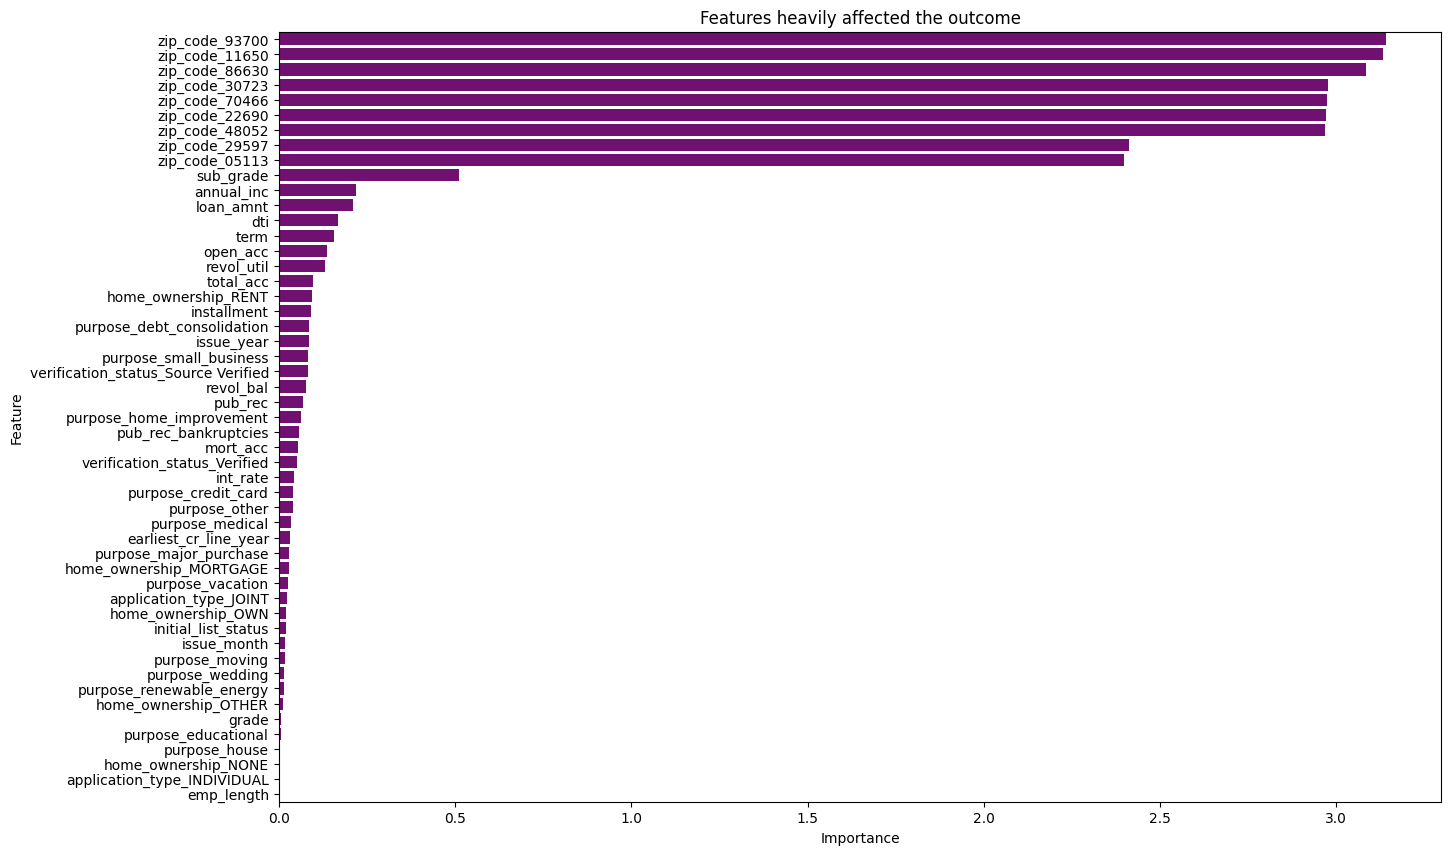

In [ ]:
# Plot the feature importances
plt.figure(figsize=(15, 10))

sns.barplot(y = Abs_Importance_df['Feature'], x = Abs_Importance_df['Abs_Importance'], color='purple')
plt.xlabel('Importance')
plt.title('Features heavily affected the outcome')
plt.show()

👉 The Features with Zip codes are heavily affected the outcome.

### <font color=#9F2B68>**Q) Will the results be affected by geographical location?**</font>

👉 The results are affected by geographical location, as indicated by the feature importance scores for zip_code variables. The high importance scores of zip_code variables suggest that geographical location plays a significant role in predicting loan default. This could be due to regional economic conditions, local credit behaviors, or different living costs, which can influence a borrower's ability to repay loans.



---
## **12) Business Insights and Recommendations🤝**
---



1. <font color=#9F2B68>**Job Title Impact:**</font>

    - **Insight:** Teachers have the highest proportion of fully paid loans, with a ratio of 5.18. Managers also show a higher likelihood of fully paying loans compared to other job titles.
    - **Recommendation:** Focus on extending credit lines to individuals with job titles associated with higher loan repayment rates, such as teachers and managers. Consider tailoring repayment terms favorably for these job titles as they present lower risk.

2. <font color=#9F2B68>**Loan Term Preferences:**</font>

    - **Insight:** The majority of loans are for 36 months, and this term is associated with higher proportions of both fully paid and charged-off loans. Loans with a term of 60 months are less common.
    - **Recommendation:** Continue offering 36-month loan terms as they align well with both borrower preferences and repayment patterns. Analyze if shorter or longer terms could be adjusted based on specific borrower profiles to balance risk and profitability.

3. <font color=#9F2B68>**Credit Grades:**</font>

    - **Insight:** Higher grades (A and B) are associated with higher repayment rates, while lower grades (C and below) are more prone to defaults.
    - **Recommendation:** Use credit grades as a primary factor in underwriting decisions. Offer more favorable terms to borrowers with higher credit grades and consider stricter criteria or higher interest rates for lower grades.

4. <font color=#9F2B68>**Home Ownership Status:**</font>

    - **Insight:** Borrowers who own homes or have mortgages tend to have higher repayment rates compared to renters.
    - **Recommendation:** Consider home ownership status as an important factor in assessing creditworthiness. Potentially provide more favorable terms to homeowners, as they show a higher likelihood of fully repaying loans.

5. <font color=#9F2B68>**Geographical Impact:**</font>

    - **Insight:** Features related to zip codes show significant importance in the model, indicating that geographical location impacts loan repayment behavior. Economic conditions and cost of living can vary greatly by location.
    - **Recommendation:** Integrate geographical data into credit assessments to better predict repayment abilities. Tailor loan products and terms based on regional economic conditions to mitigate risks associated with geographical variability.


<font color=#9F2B68>**Conclusion😀**</font>

- **Model Selection:** The final model with a customized threshold shows **strong precision (0.95) and a robust F1 score (0.87). It balances minimizing false positives and maintaining a reasonable recall rate, making it suitable for deployment.**
- **Action:** Regularly monitor and update the model to adapt to changes in borrower behavior and market conditions. Use the insights to refine credit policies and improve loan performance metrics.

These insights and recommendations will help in optimizing the credit extension process, managing risks, and improving the overall profitability and efficiency of the underwriting process.



---


---




**By**

SANKARAN MEENAKSHI SUNDARAM

DSML July 2023